In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import iglob

# Import and proprocess data

In [2]:
def conversion_iter(x, num_cells):
    if num_cells=='10k':
        return [10000*y for y in x]
    elif num_cells=='100k':
        return [100000*y for y in x]
    elif num_cells=='500k':
        return [500000*y for y in x]
    elif num_cells=='1M':
        return [1000000*y for y in x]
    return x

conversion_obs = {'10k': 10000, '100k': 100000, '500k': 500000, '1M': 1000000}

In [3]:
genes = ['2k', '10k', 'all']
cells = ['10k', '500k']
layers = ['1', '2', '4']
hidden = ['128', '256', '512', '1024', '2048']
data_names = ['elbo', 'reconstr_loss', 'loss', 'metrics']

empty_data = []
not_existent = []
empty_folder = []
data = []
for d in data_names:
    metric_data = []
    for c in cells:
        for g in genes:
            for l in layers:
                for h in hidden:
                    if d=='metrics':
                        csv =[]
                        for path in iglob(f'{c}/{g}_genes/{l}/{h}/metrics/metrics_*.csv'):
                            try:
                                csv.append(pd.read_csv(path))
                            except pd.errors.EmptyDataError:
                                empty_data.append(path)
                            except FileNotFoundError:
                                not_existent.append(path)
                        try:
                            csv = pd.concat(csv)
                        except ValueError:
                            empty_folder.append(f'{c}/{g}_genes/{l}/{h}')
                            csv = pd.DataFrame(columns = ['', 'n_obs', 'n_cells', 'n_genes', 'n_layers', 'n_hidden', 'metric', 'value'])
                    else:
                        csv = pd.read_csv(f'{c}/{g}_genes/{l}/{h}/metrics/{d}.csv')
                        csv['iteration']=conversion_iter(csv['Unnamed: 0'], c)
                        csv['genes'] = g
                        csv['cells'] = c
                        csv['layers'] = l
                        csv['hidden'] = h
                        csv['n_obs'] = conversion_obs[c]
                    metric_data.append(csv)
                
    data.append(pd.concat(metric_data))

In [531]:
empty_folder

[]

In [4]:
elbo = data[0].rename(columns={'Unnamed: 0': 'epoch', 'train_elbo': 'train_elbo', 'val_elbo': 'val_elbo', 'genes': 'genes', 'cells': 'cells', 'layers': 'layers', 'hidden': 'hidden', 'iteration': 'iteration'})
scib = data[3]
recon = data[1].rename(columns={'Unnamed: 0': 'epoch', 'train_recon_loss': 'train_recon_loss', 'val_recon_loss': 'val_recon_loss', 'genes': 'genes', 'cells': 'cells', 'layers': 'layers', 'hidden': 'hidden', 'iteration': 'iteration'})
loss = data[2].rename(columns={'Unnamed: 0': 'epoch', 'train_loss': 'train_loss', 'val_loss': 'val_loss', 'genes': 'genes', 'cells': 'cells', 'layers': 'layers', 'hidden': 'hidden', 'iteration': 'iteration'})

In [5]:
elbo = pd.melt(elbo, id_vars=['epoch', 'genes', 'cells', 'iteration', 'layers', 'hidden'], value_vars=['train_elbo', 'val_elbo'], value_name='elbo', var_name='cat')
recon = pd.melt(recon, id_vars=['epoch', 'genes', 'cells', 'iteration', 'layers', 'hidden'], value_vars=['train_recon_loss', 'val_recon_loss'], value_name='recon_loss', var_name='cat')
loss = pd.melt(loss, id_vars=['epoch', 'genes', 'cells', 'iteration', 'layers', 'hidden'], value_vars=['train_loss', 'val_loss'], value_name='loss', var_name='cat')

In [9]:
elbo.hidden.unique()

array(['128', '256', '512', '1024', '2048'], dtype=object)

# ELBO

In [399]:
elbo['key_data'] = elbo['cells']+'_'+elbo['genes']
elbo['key_nn'] = elbo['layers']+'_'+elbo['hidden'] 

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

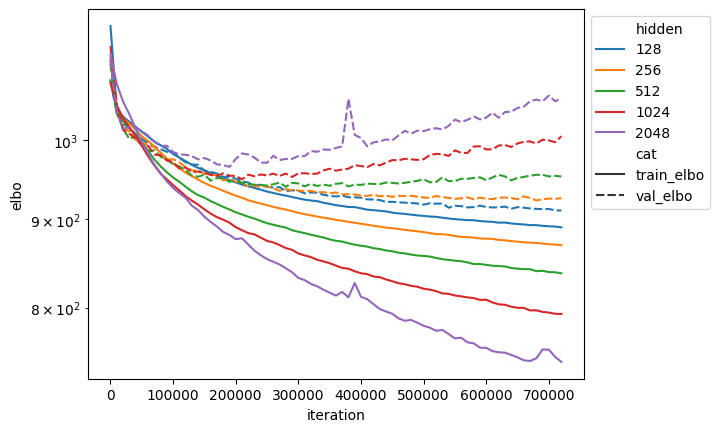

In [400]:
tmp = elbo[elbo['layers']=='1']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_2k'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

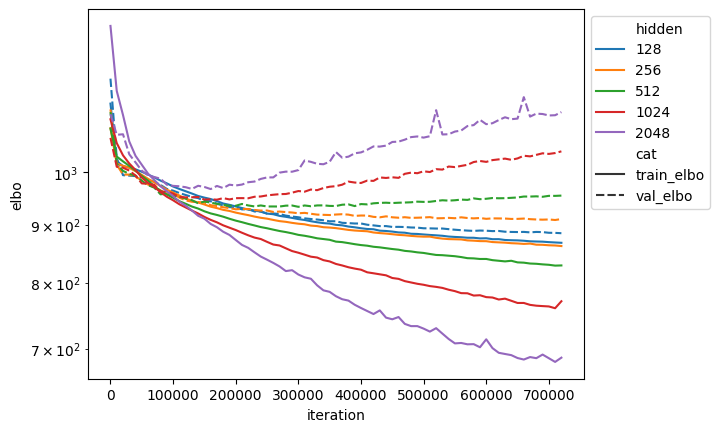

In [401]:
tmp = elbo[elbo['layers']=='2']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_2k'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

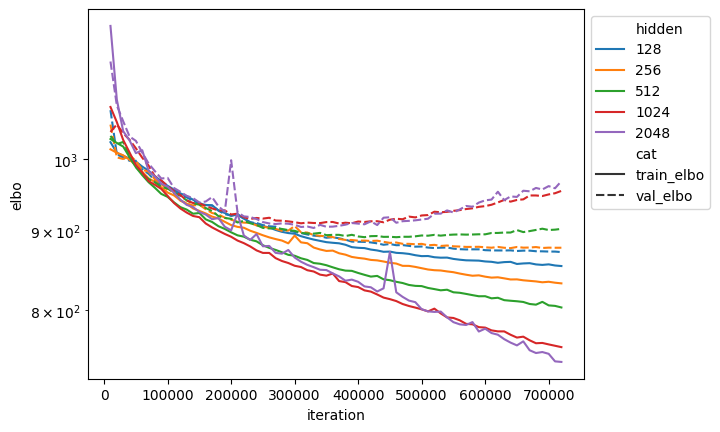

In [402]:
tmp = elbo[elbo['layers']=='4']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='10k_2k'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

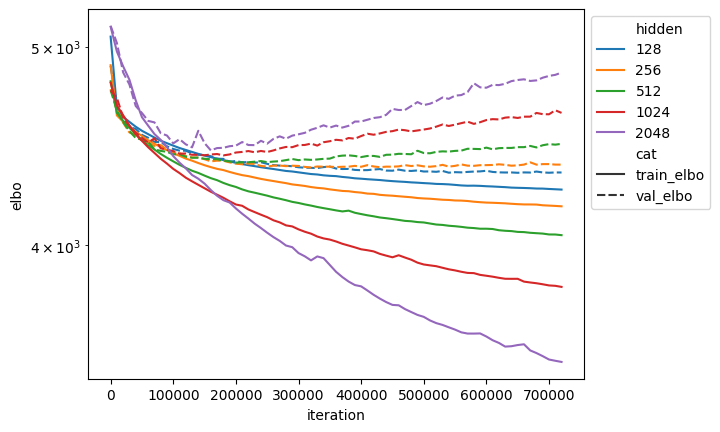

In [403]:
tmp = elbo[elbo['layers']=='1']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_10k'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

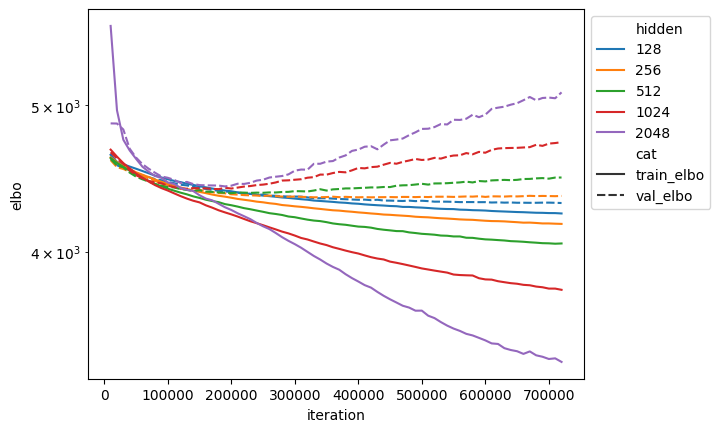

In [404]:
tmp = elbo[elbo['layers']=='2']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='10k_10k'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

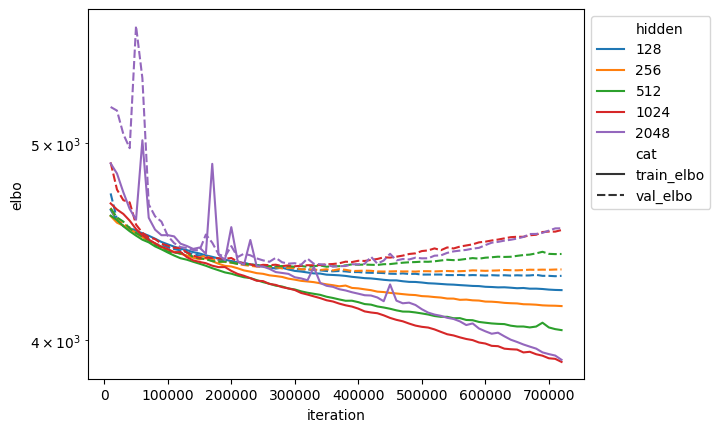

In [405]:
tmp = elbo[elbo['layers']=='4']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='10k_10k'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

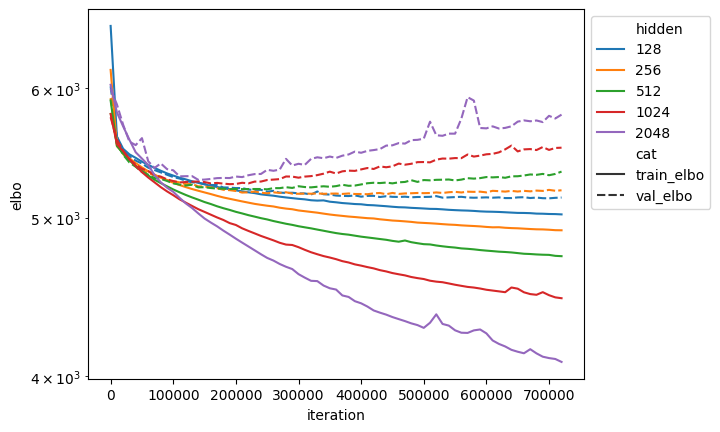

In [406]:
tmp = elbo[elbo['layers']=='1']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_all'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

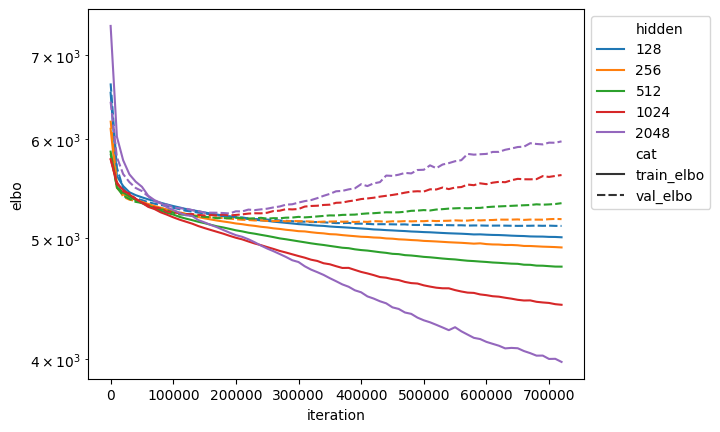

In [407]:
tmp = elbo[elbo['layers']=='2']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_all'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

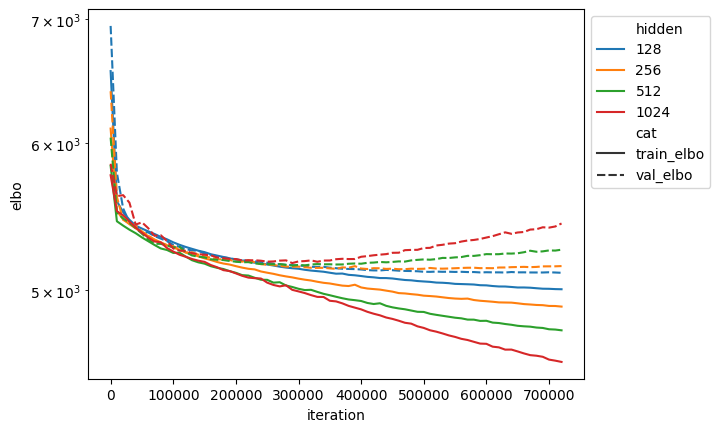

In [408]:
tmp = elbo[elbo['layers']=='4']
tmp = tmp[tmp['hidden']!='2048']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_all'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

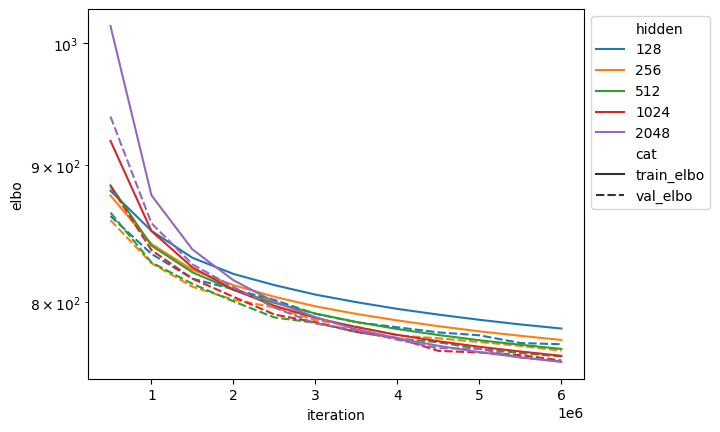

In [409]:
tmp = elbo[elbo['layers']=='1']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_2k'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

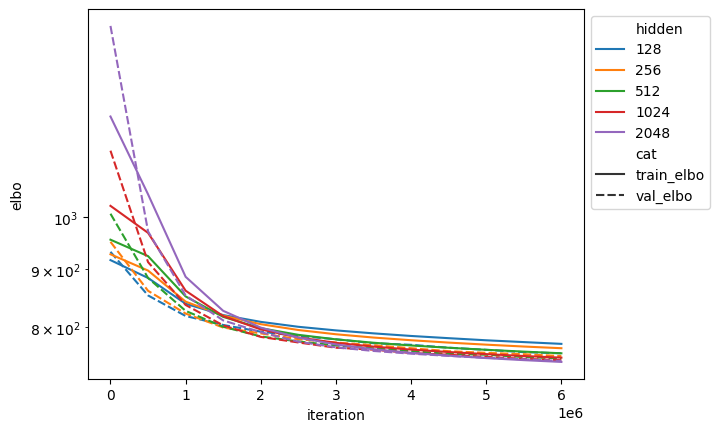

In [410]:
tmp = elbo[elbo['layers']=='2']
fig = sns.lineplot(tmp[tmp['key_data']=='500k_2k'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

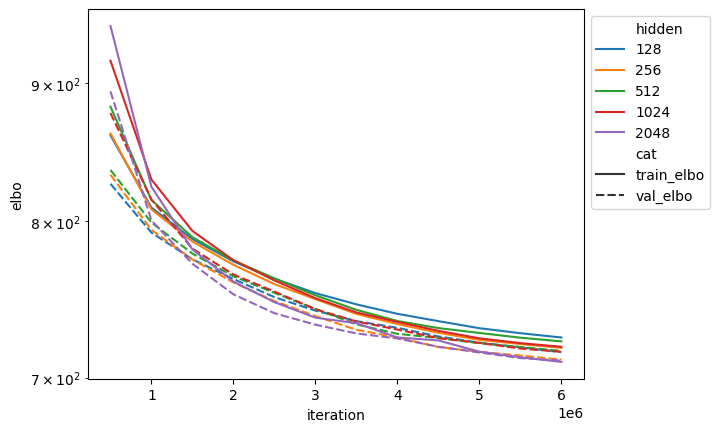

In [411]:
tmp = elbo[elbo['layers']=='4']
tmp = tmp[tmp['iteration']>=500000]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_2k'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

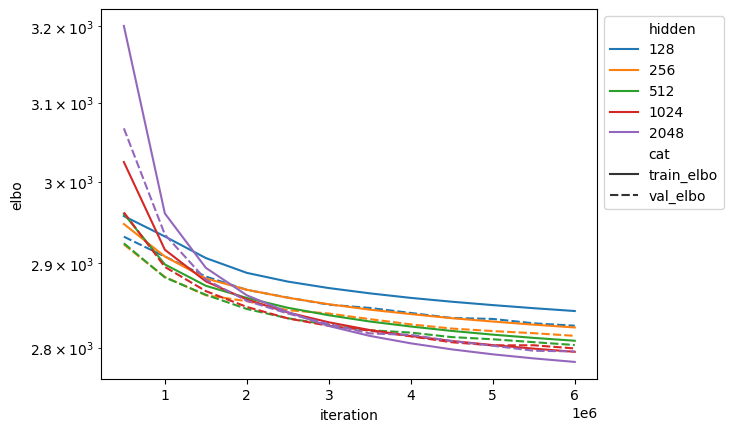

In [412]:
tmp = elbo[elbo['layers']=='1']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_10k'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

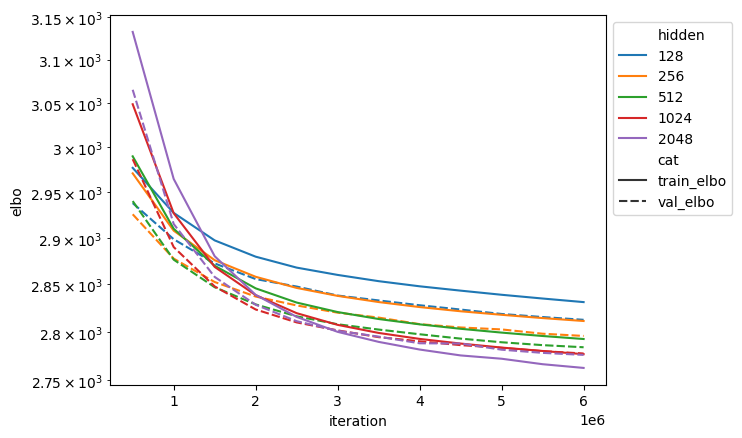

In [413]:
tmp = elbo[elbo['layers']=='2']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_10k'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

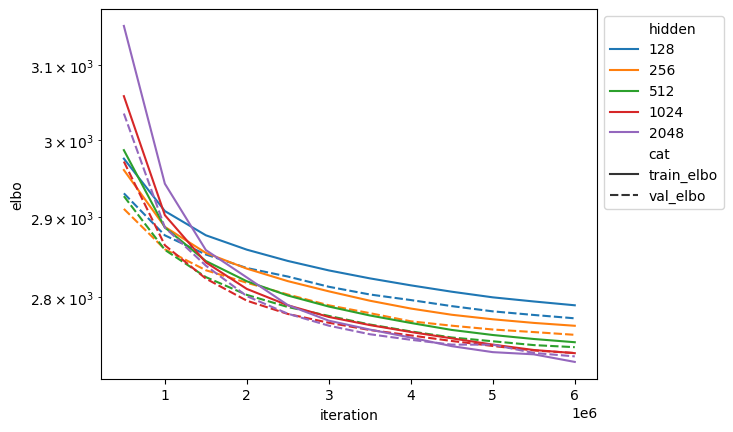

In [414]:
tmp = elbo[elbo['layers']=='4']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_10k'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

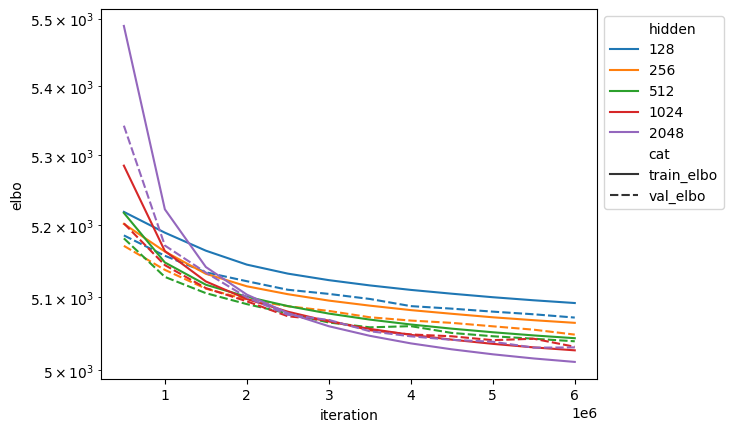

In [415]:
tmp = elbo[elbo['layers']=='1']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_all'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

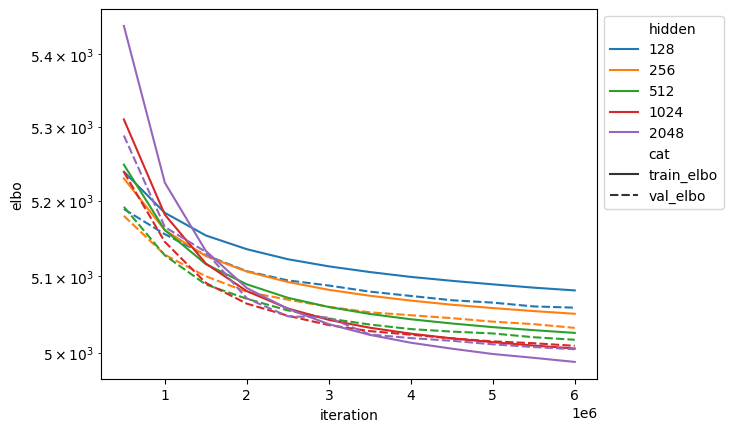

In [416]:
tmp = elbo[elbo['layers']=='2']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_all'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

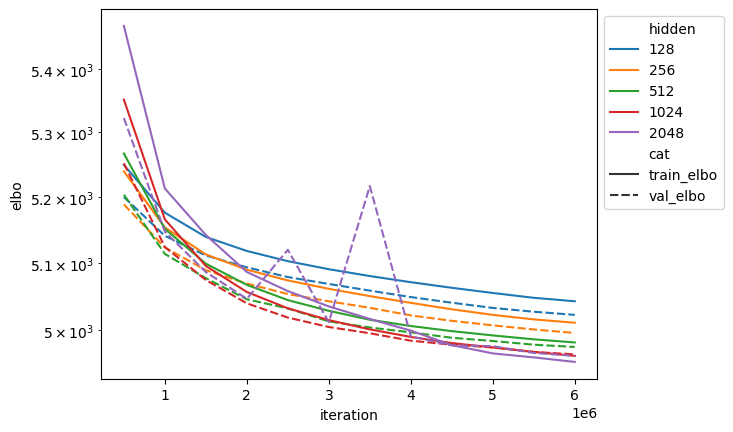

In [417]:
tmp = elbo[elbo['layers']=='4']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_all'], x='iteration', y='elbo', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

# Reconstruction Loss

In [6]:
recon['key_data'] = recon['cells']+'_'+recon['genes']

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

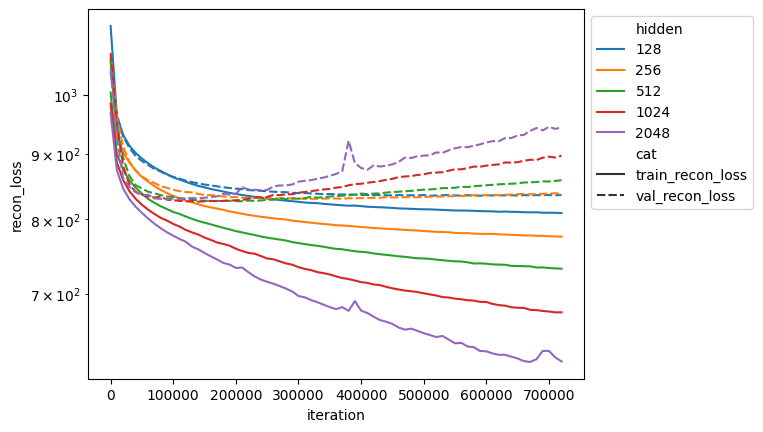

In [419]:
tmp = recon[recon['layers']=='1']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_2k'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

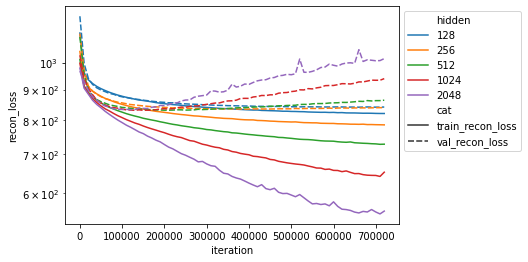

In [7]:
tmp = recon[recon['layers']=='2']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_2k'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

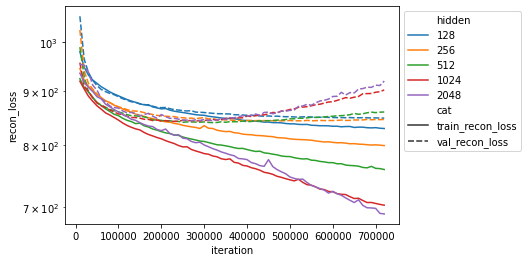

In [8]:
tmp = recon[recon['layers']=='4']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='10k_2k'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

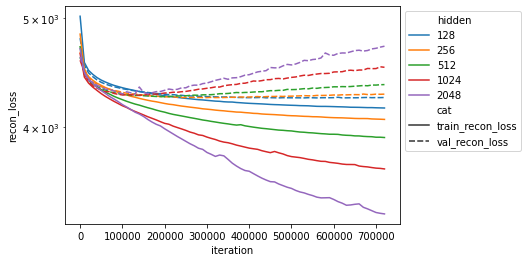

In [9]:
tmp = recon[recon['layers']=='1']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_10k'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

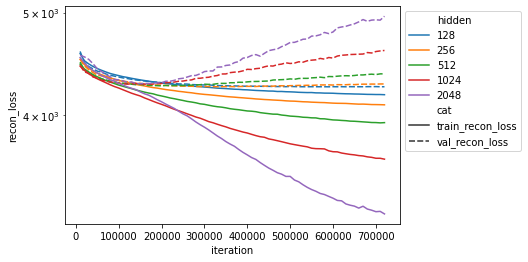

In [10]:
tmp = recon[recon['layers']=='2']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='10k_10k'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

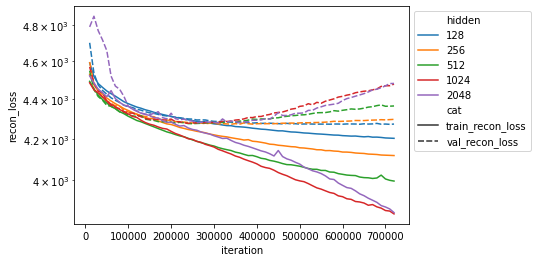

In [11]:
tmp = recon[recon['layers']=='4']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='10k_10k'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

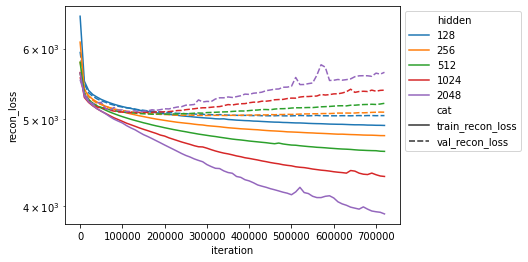

In [12]:
tmp = recon[recon['layers']=='1']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_all'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

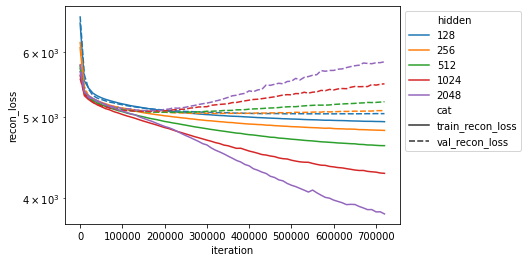

In [13]:
tmp = recon[recon['layers']=='2']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_all'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

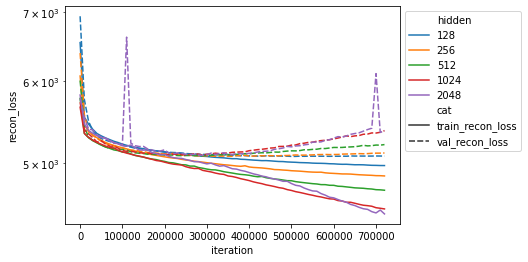

In [17]:
tmp = recon[recon['layers']=='4']
#tmp = tmp[tmp['hidden']!='2048']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_all'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

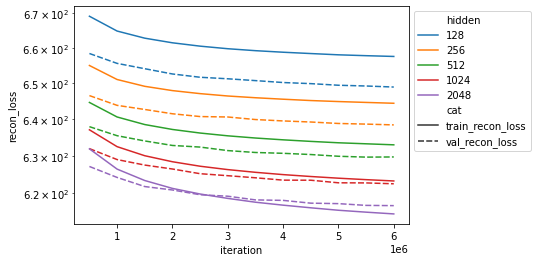

In [14]:
tmp = recon[recon['layers']=='1']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_2k'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

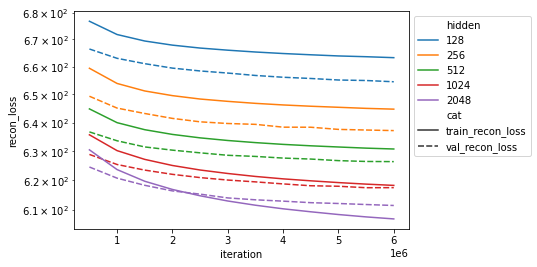

In [15]:
tmp = recon[recon['layers']=='2']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_2k'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

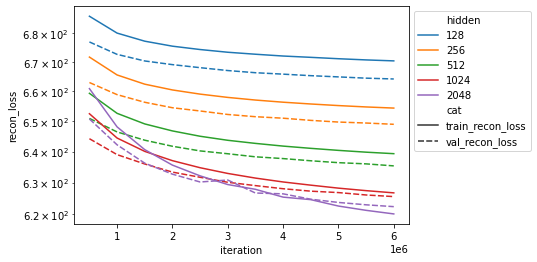

In [18]:
tmp = recon[recon['layers']=='4']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_2k'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

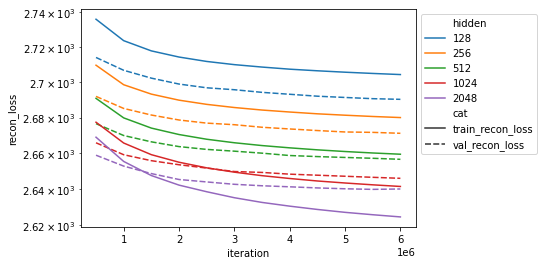

In [19]:
tmp = recon[recon['layers']=='1']
tmp = tmp[tmp['iteration']>=250000]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_10k'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

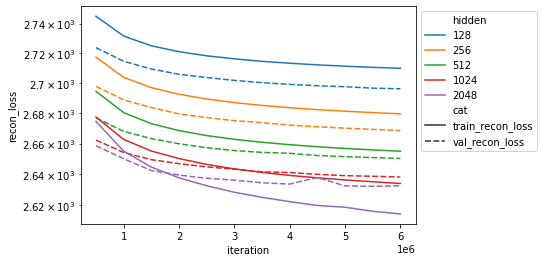

In [20]:
tmp = recon[recon['layers']=='2']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_10k'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

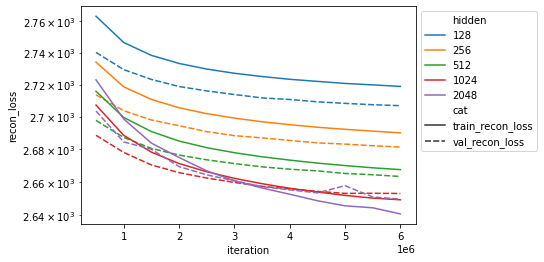

In [21]:
tmp = recon[recon['layers']=='4']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_10k'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

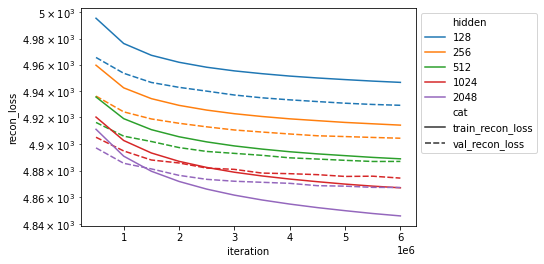

In [22]:
tmp = recon[recon['layers']=='1']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_all'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

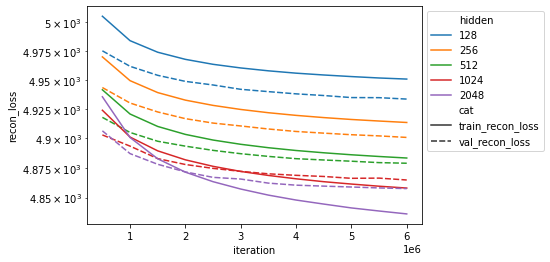

In [23]:
tmp = recon[recon['layers']=='2']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_all'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

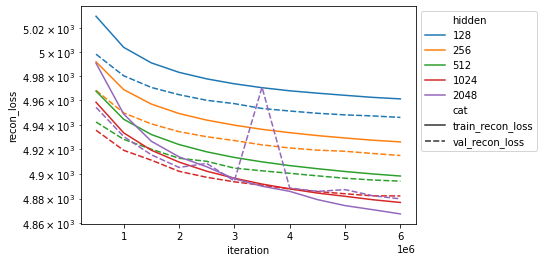

In [24]:
tmp = recon[recon['layers']=='4']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_all'], x='iteration', y='recon_loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

# Loss

In [25]:
loss['key_data'] = loss['cells']+'_'+loss['genes']
loss['key_nn'] = loss['layers']+'_'+loss['hidden']

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

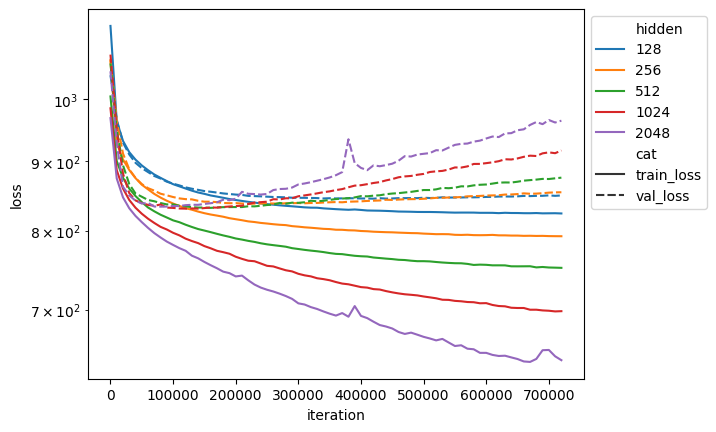

In [438]:
tmp = loss[loss['layers']=='1']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_2k'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

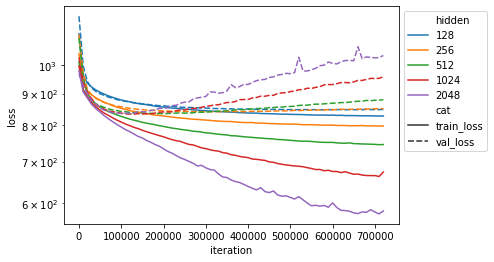

In [26]:
tmp = loss[loss['layers']=='2']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_2k'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

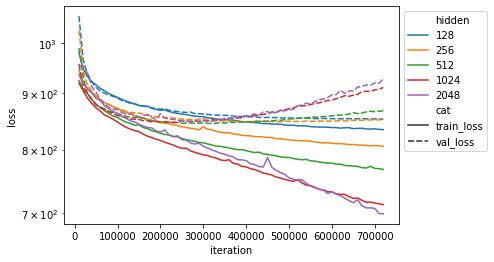

In [27]:
tmp = loss[loss['layers']=='4']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='10k_2k'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

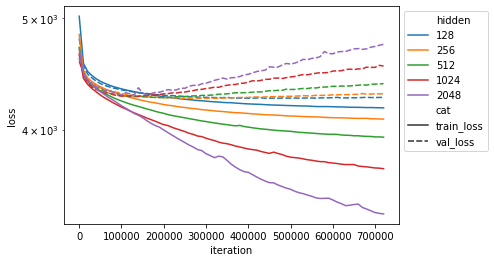

In [28]:
tmp = loss[loss['layers']=='1']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_10k'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

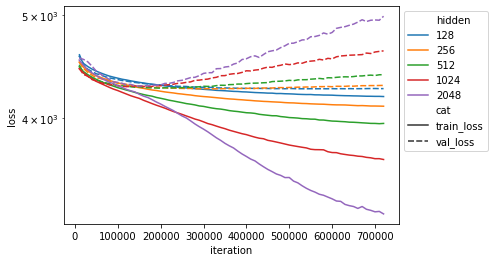

In [29]:
tmp = loss[loss['layers']=='2']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='10k_10k'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

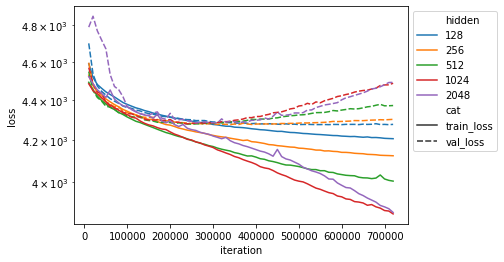

In [30]:
tmp = loss[loss['layers']=='4']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='10k_10k'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

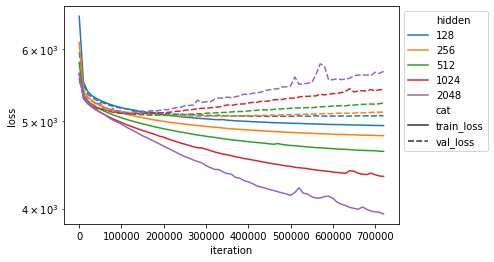

In [31]:
tmp = loss[loss['layers']=='1']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_all'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

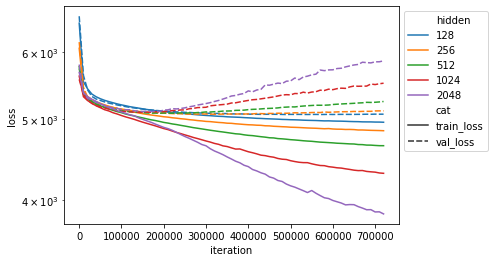

In [32]:
tmp = loss[loss['layers']=='2']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_all'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

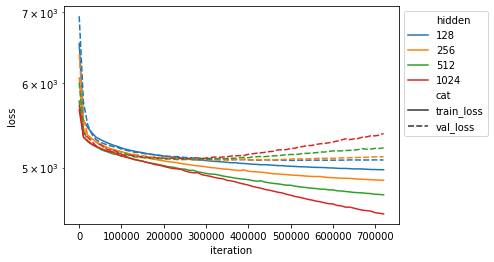

In [33]:
tmp = loss[loss['layers']=='4']
tmp = tmp[tmp['hidden']!='2048']
fig = sns.lineplot(tmp[tmp['key_data']=='10k_all'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

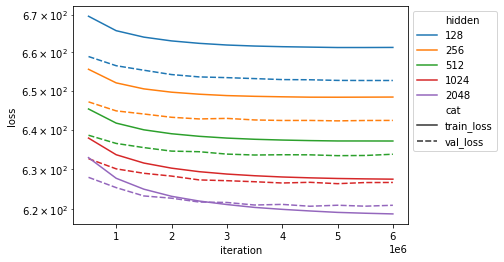

In [34]:
tmp = loss[loss['layers']=='1']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_2k'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

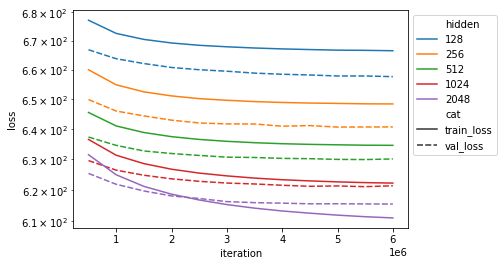

In [35]:
tmp = loss[loss['layers']=='2']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_2k'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

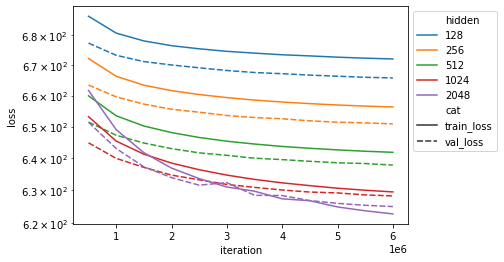

In [36]:
tmp = loss[loss['layers']=='4']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_2k'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

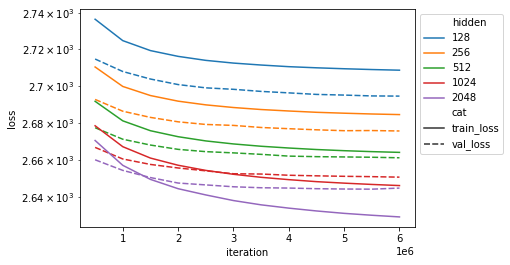

In [37]:
tmp = loss[loss['layers']=='1']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_10k'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

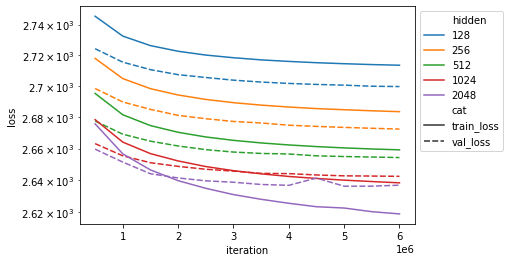

In [38]:
tmp = loss[loss['layers']=='2']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_10k'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

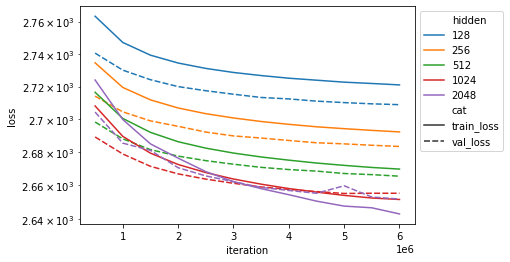

In [39]:
tmp = loss[loss['layers']=='4']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_10k'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

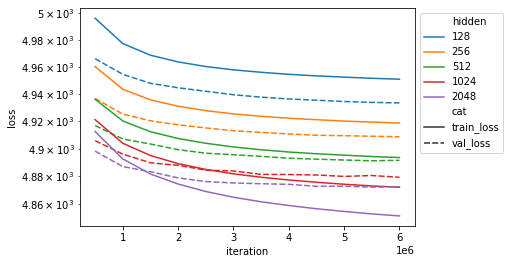

In [40]:
tmp = loss[loss['layers']=='1']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_all'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

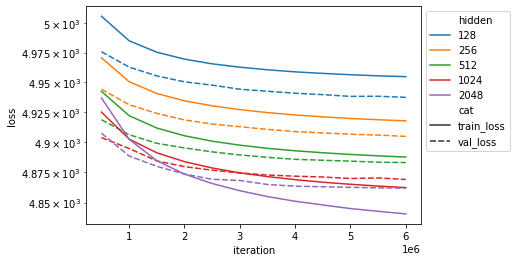

In [41]:
tmp = loss[loss['layers']=='2']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_all'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

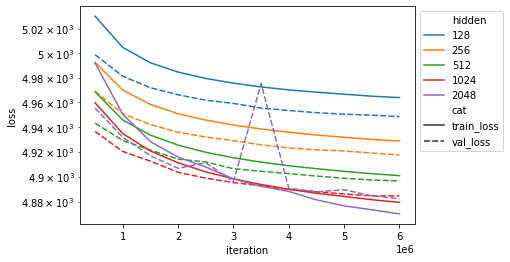

In [42]:
tmp = loss[loss['layers']=='4']
tmp = tmp[tmp['iteration']!=0]
fig = sns.lineplot(tmp[tmp['key_data']=='500k_all'], x='iteration', y='loss', hue='hidden', style='cat')
fig.set(yscale='log')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

# Metrics

In [456]:
scib['n_layers'] = scib['n_layers'].apply(str)
scib['n_hidden'] = scib['n_hidden'].apply(str)
scib['key'] = scib['n_cells']+'_'+scib['n_genes']+'_'+scib['n_layers']+'_'+scib['n_hidden']
scib['key_cells'] = scib['n_genes']+'_'+scib['n_layers']+'_'+scib['n_hidden']
scib['key_genes'] = scib['n_cells']+'_'+scib['n_layers']+'_'+scib['n_hidden']

## HGV Overlap

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.27, 0.7)

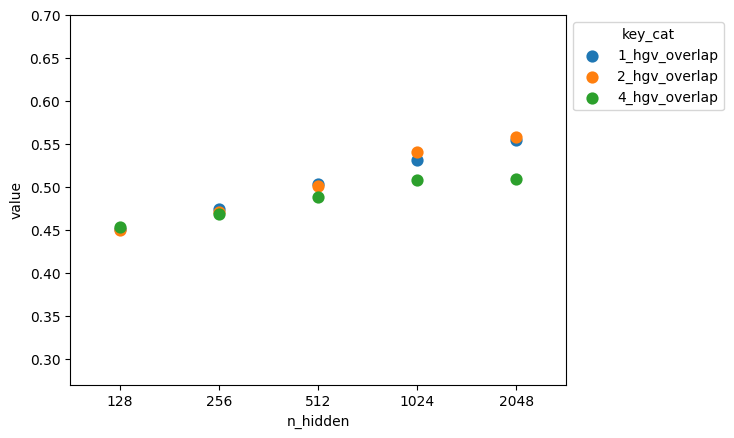

In [457]:
tmp = scib[scib['metric']=='hgv_overlap']
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.27, 0.7)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.27, 0.7)

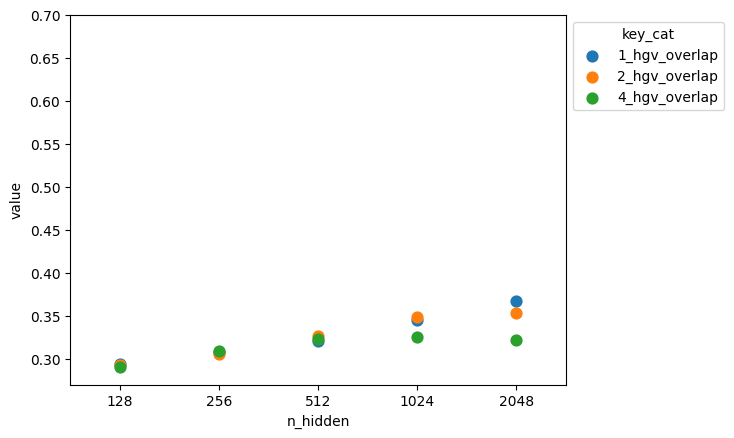

In [458]:
tmp = scib[scib['metric']=='hgv_overlap']
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.27, 0.7)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.27, 0.7)

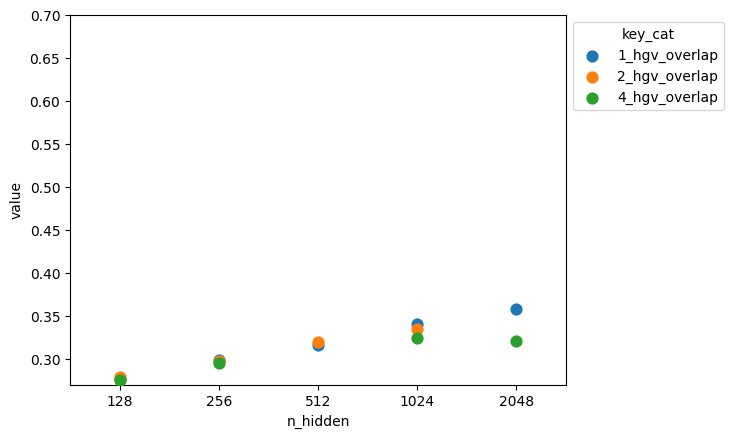

In [459]:
tmp = scib[scib['metric']=='hgv_overlap']
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.27, 0.7)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.27, 0.7)

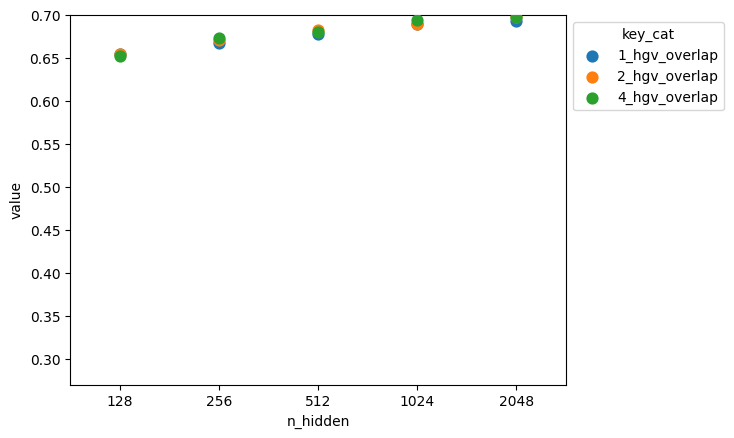

In [460]:
tmp = scib[scib['metric']=='hgv_overlap']
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.27, 0.7)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.27, 0.7)

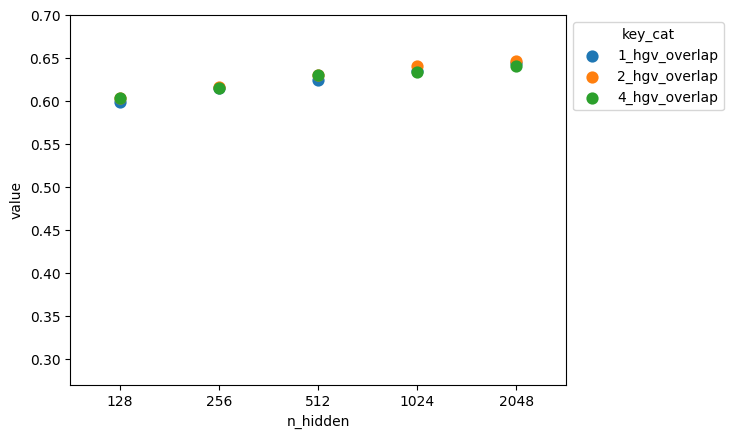

In [461]:
tmp = scib[scib['metric']=='hgv_overlap']
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.27, 0.7)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.27, 0.7)

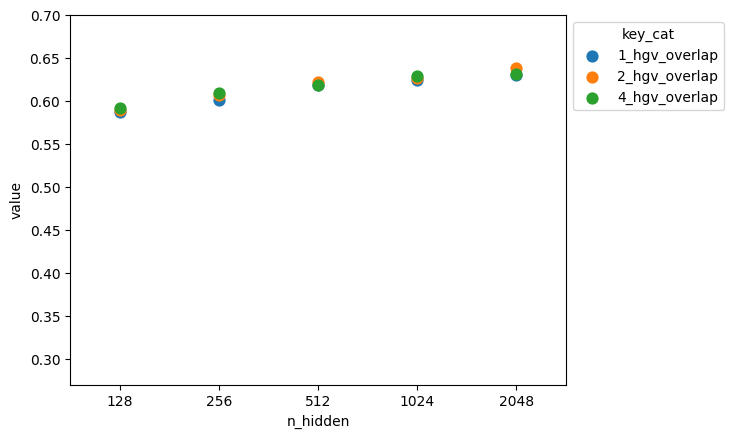

In [462]:
tmp = scib[scib['metric']=='hgv_overlap']
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.27, 0.7)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.27, 0.7)

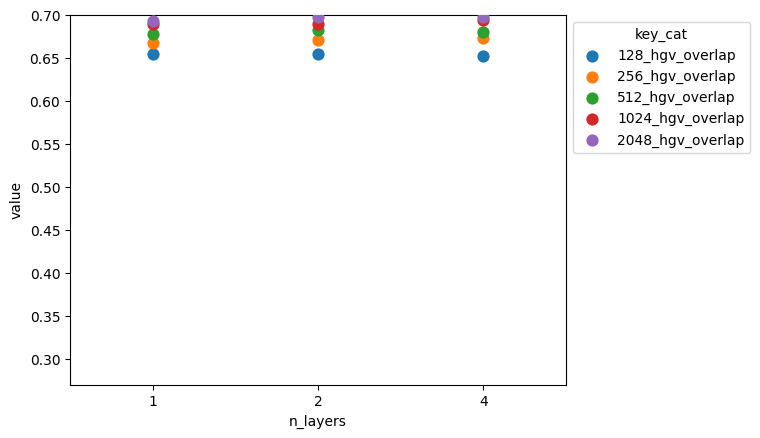

In [532]:
tmp = scib[scib['metric']=='hgv_overlap']
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.27, 0.7)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.27, 0.7)

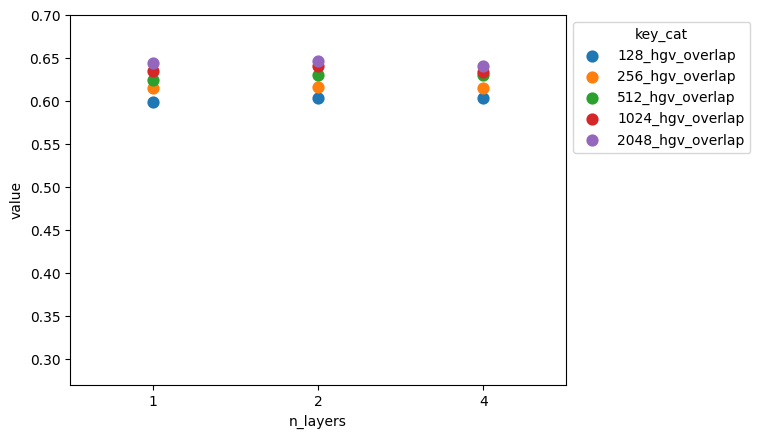

In [533]:
tmp = scib[scib['metric']=='hgv_overlap']
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.27, 0.7)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.27, 0.7)

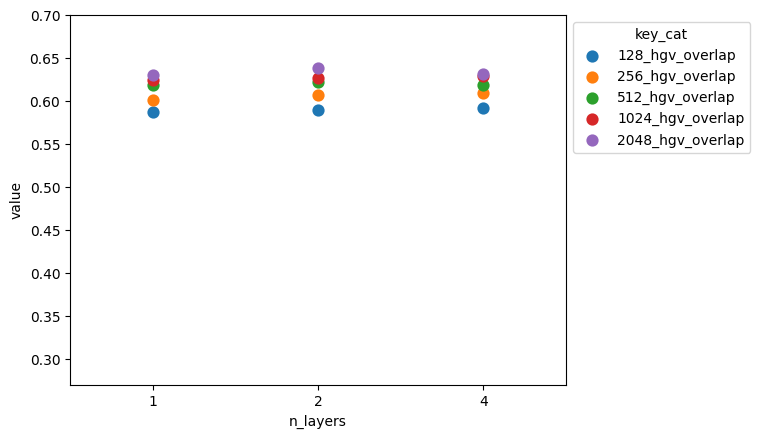

In [534]:
tmp = scib[scib['metric']=='hgv_overlap']
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.27, 0.7)

## Trajectory conservation

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.9)

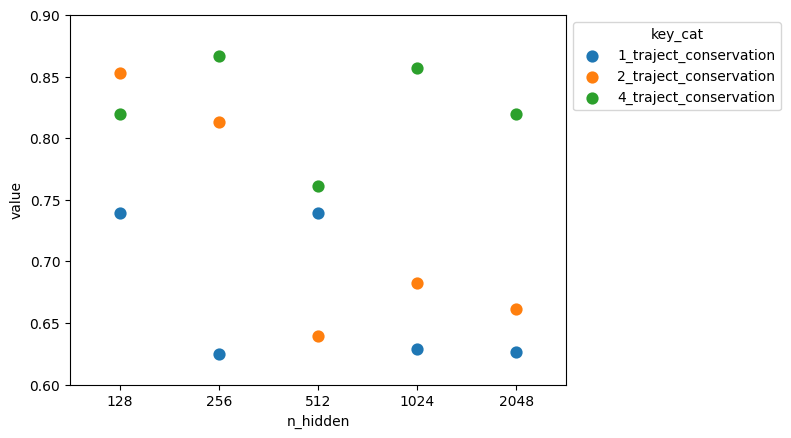

In [463]:
tmp = scib[scib['metric']=='traject_conservation']
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.9)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.9)

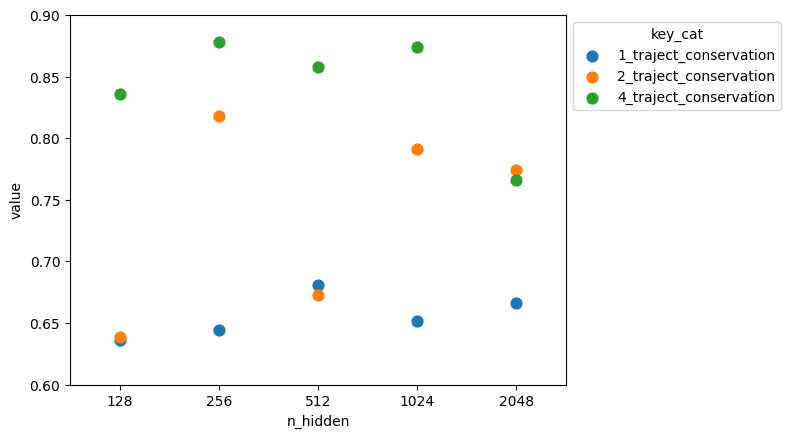

In [464]:
tmp = scib[scib['metric']=='traject_conservation']
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.9)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.9)

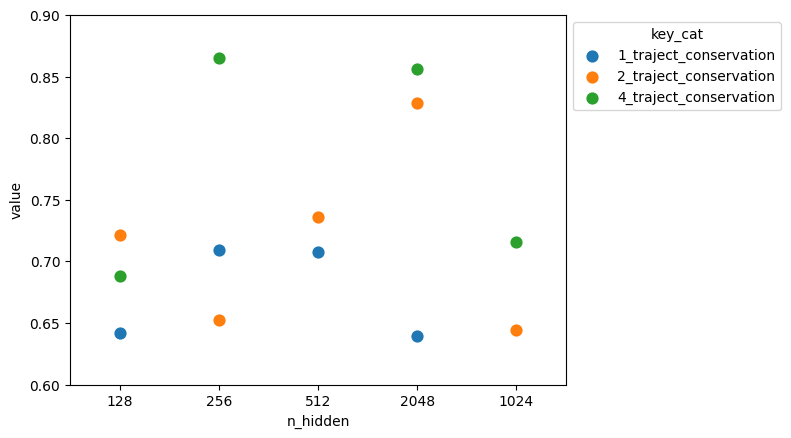

In [465]:
tmp = scib[scib['metric']=='traject_conservation']
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.9)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.9)

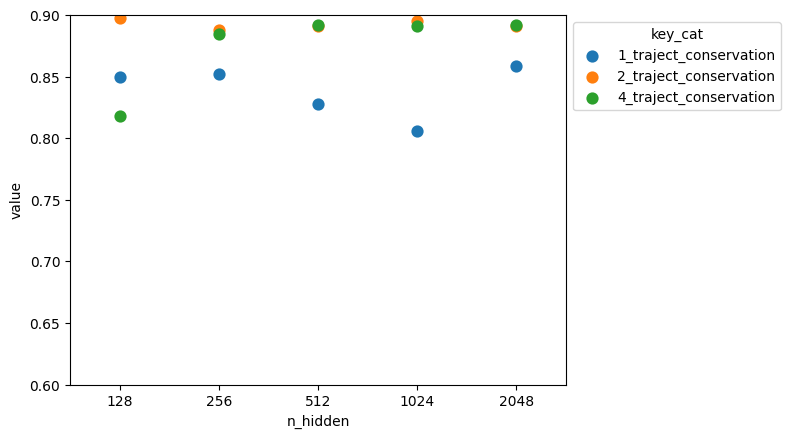

In [466]:
tmp = scib[scib['metric']=='traject_conservation']
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.9)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.9)

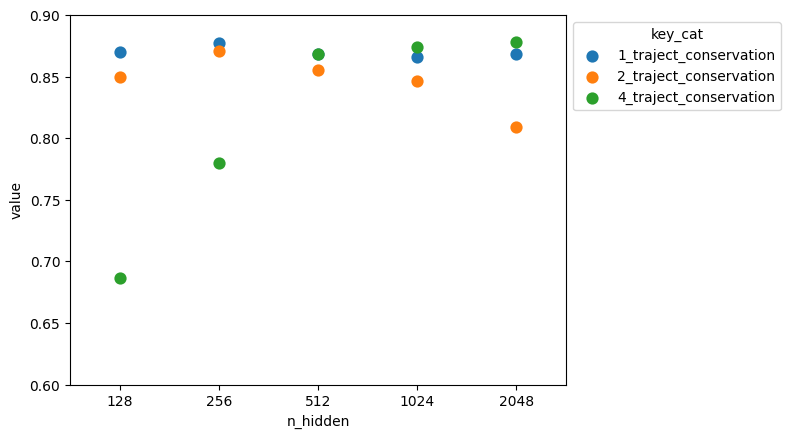

In [467]:
tmp = scib[scib['metric']=='traject_conservation']
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.9)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.9)

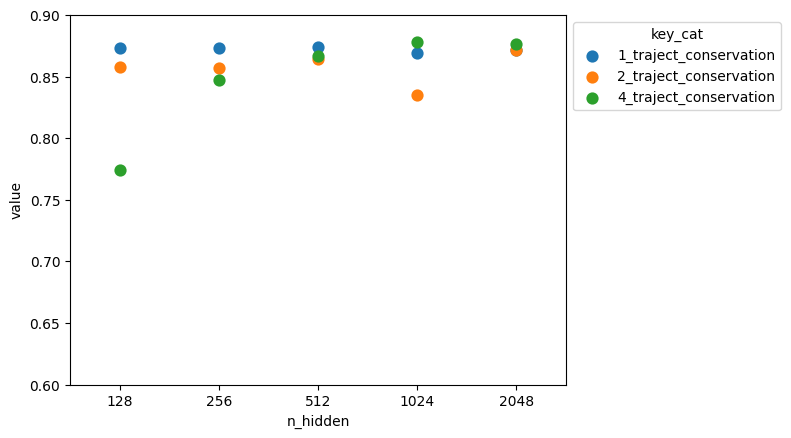

In [468]:
tmp = scib[scib['metric']=='traject_conservation']
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.9)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.9)

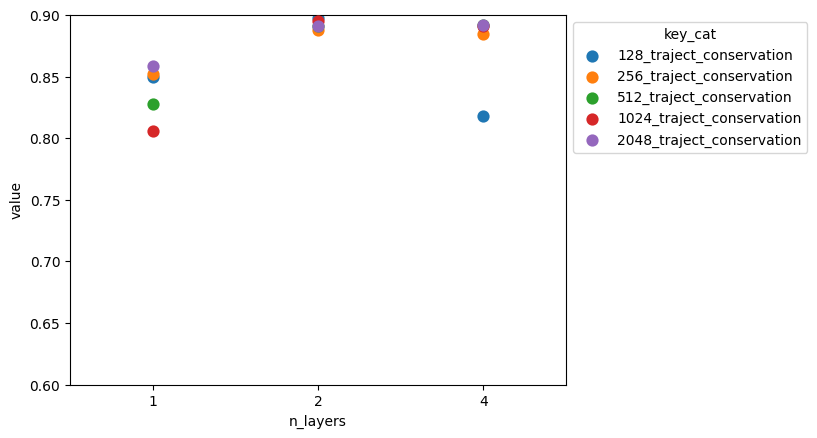

In [535]:
tmp = scib[scib['metric']=='traject_conservation']
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.9)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.9)

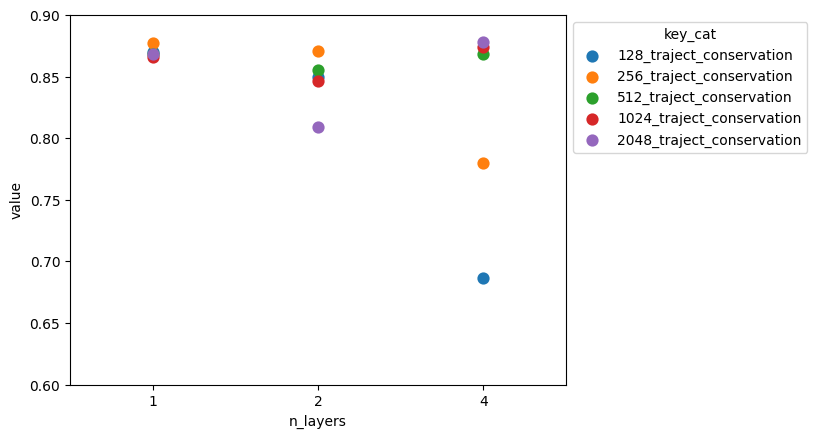

In [536]:
tmp = scib[scib['metric']=='traject_conservation']
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.9)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.9)

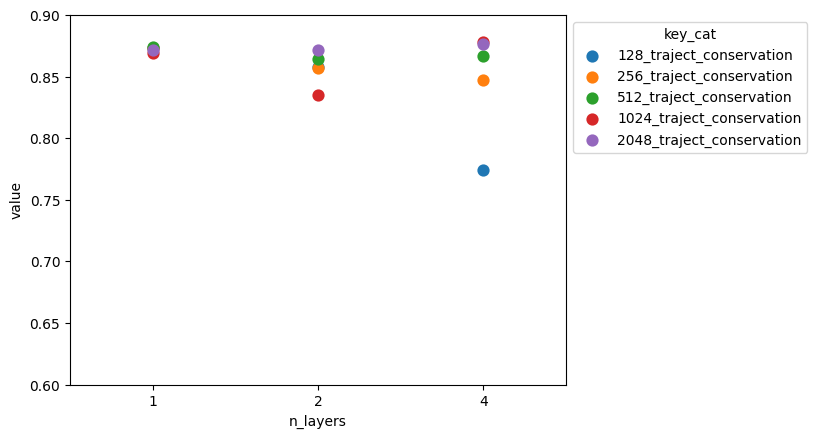

In [537]:
tmp = scib[scib['metric']=='traject_conservation']
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.9)

## Principle Component Regession

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.15)

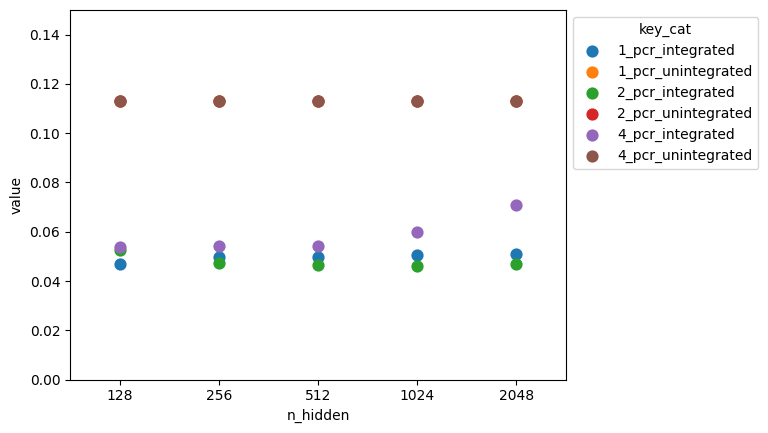

In [469]:
tmp = scib[[x in ['pcr_integrated', 'pcr_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 0.15)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.15)

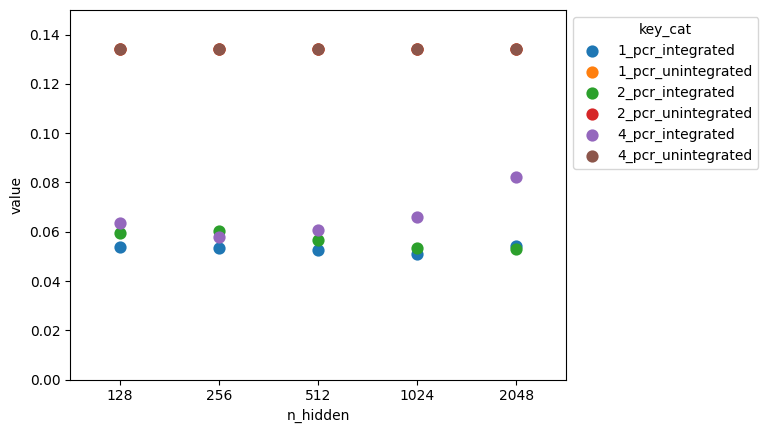

In [470]:
tmp = scib[[x in ['pcr_integrated', 'pcr_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 0.15)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.15)

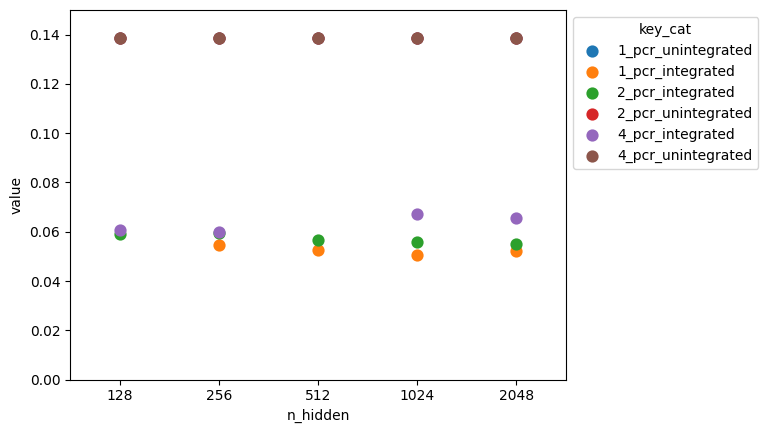

In [471]:
tmp = scib[[x in ['pcr_integrated', 'pcr_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 0.15)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.15)

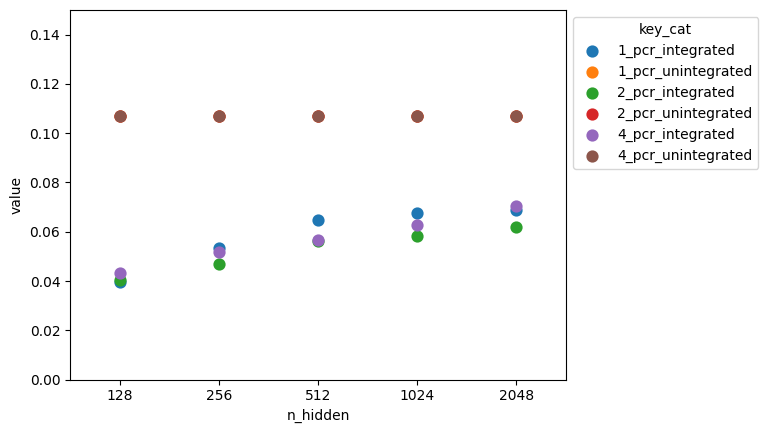

In [472]:
tmp = scib[[x in ['pcr_integrated', 'pcr_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 0.15)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.15)

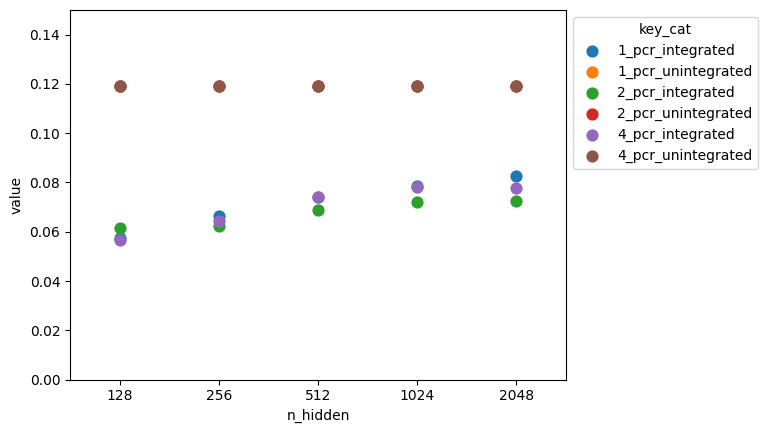

In [473]:
tmp = scib[[x in ['pcr_integrated', 'pcr_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 0.15)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.15)

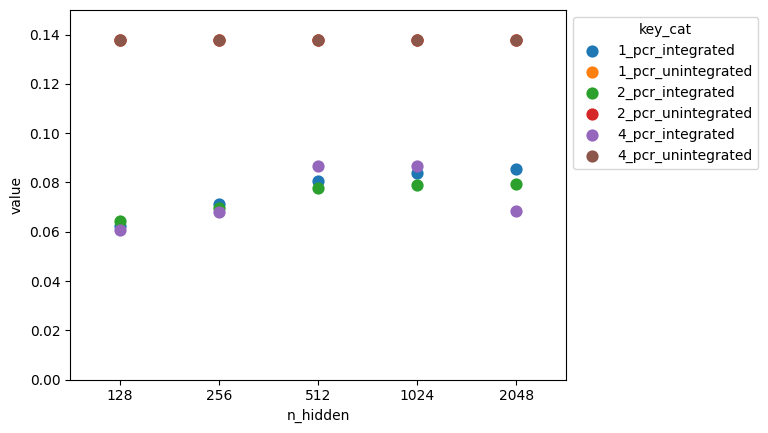

In [474]:
tmp = scib[[x in ['pcr_integrated', 'pcr_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 0.15)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.15)

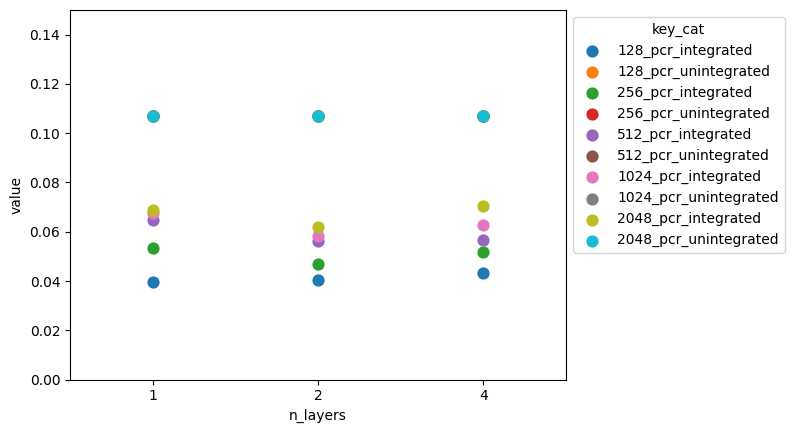

In [539]:
tmp = scib[[x in ['pcr_integrated', 'pcr_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 0.15)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.15)

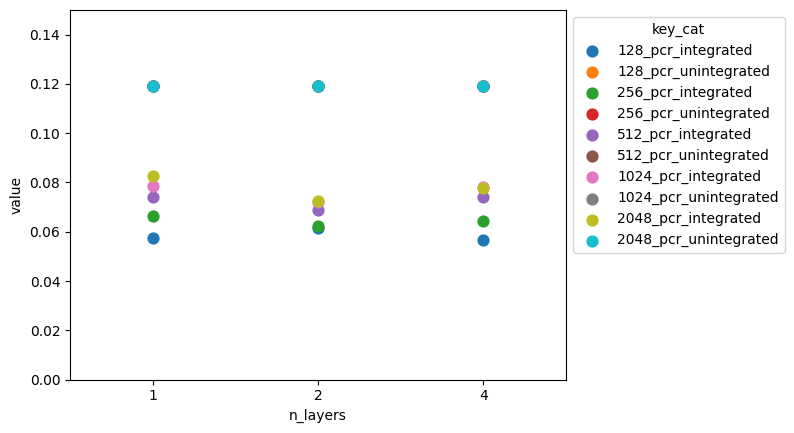

In [540]:
tmp = scib[[x in ['pcr_integrated', 'pcr_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 0.15)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.15)

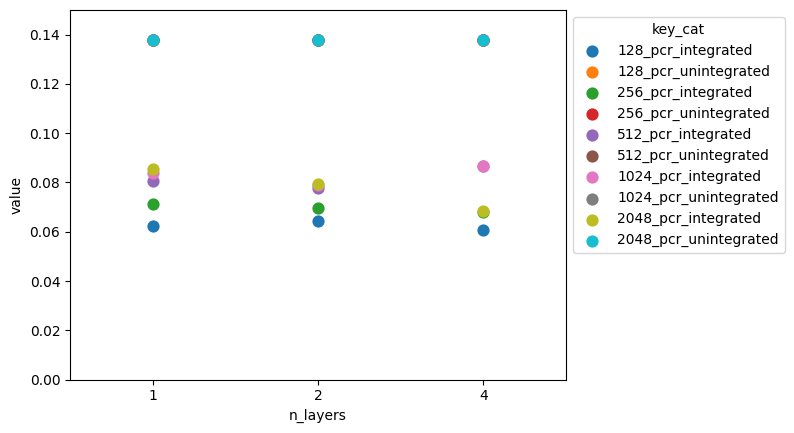

In [541]:
tmp = scib[[x in ['pcr_integrated', 'pcr_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 0.15)

## Graph connectivity

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.65, 1.0)

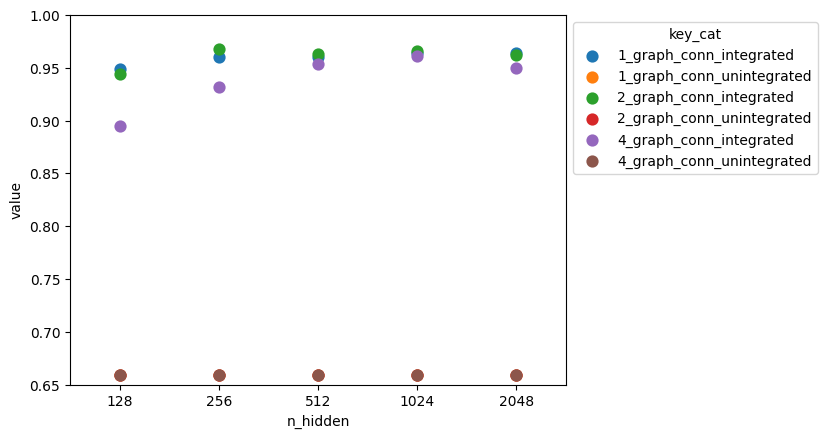

In [475]:
tmp = scib[[x in ['graph_conn_integrated', 'graph_conn_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.65, 1)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.65, 1.0)

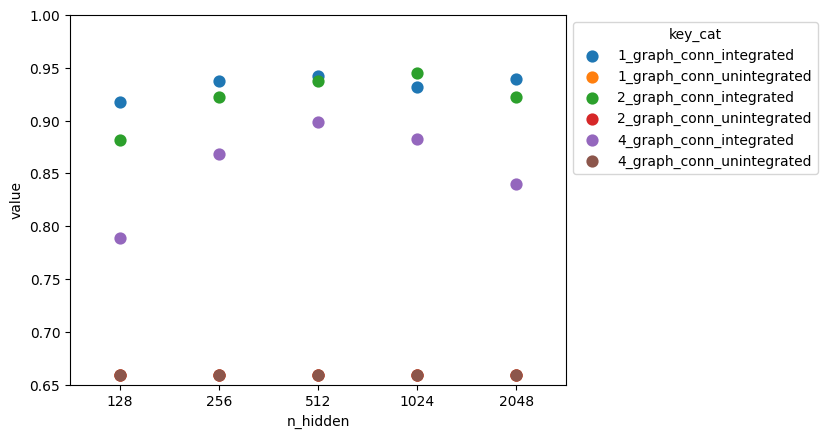

In [476]:
tmp = scib[[x in ['graph_conn_integrated', 'graph_conn_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.65, 1)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.65, 1.0)

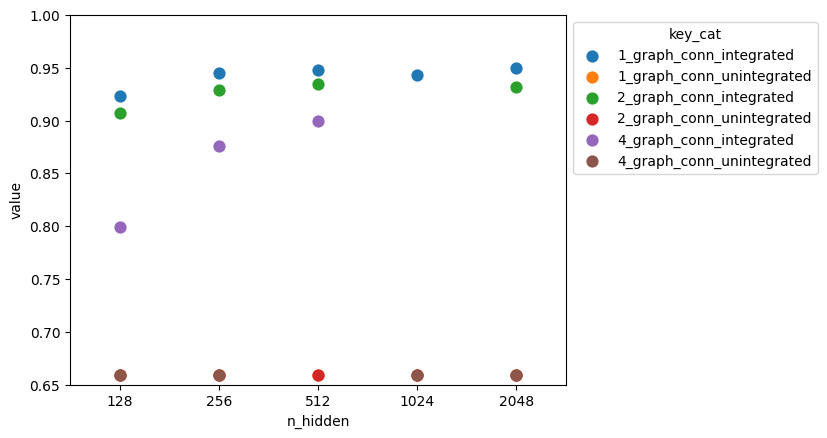

In [477]:
tmp = scib[[x in ['graph_conn_integrated', 'graph_conn_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.65, 1)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.65, 1.0)

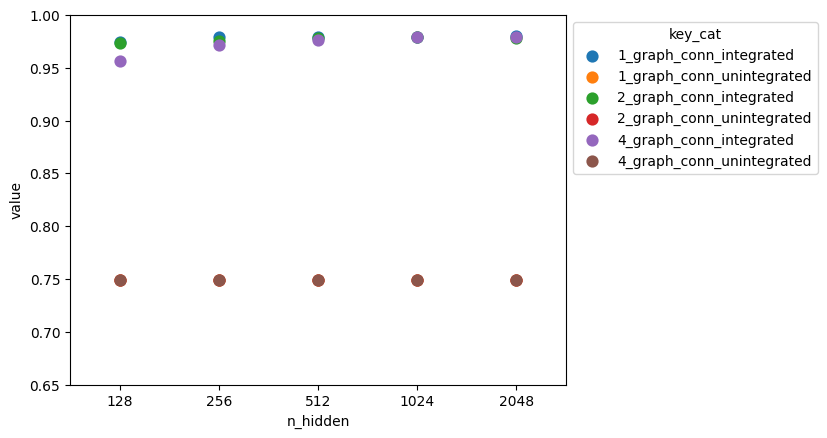

In [478]:
tmp = scib[[x in ['graph_conn_integrated', 'graph_conn_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.65, 1)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.65, 1.0)

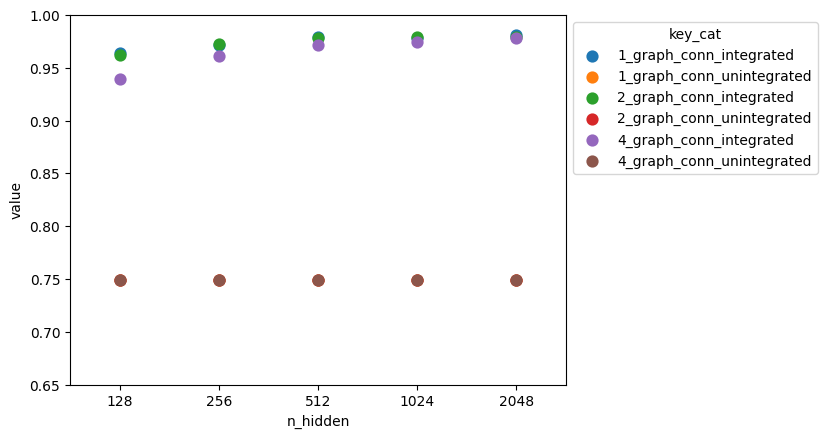

In [479]:
tmp = scib[[x in ['graph_conn_integrated', 'graph_conn_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.65, 1)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.65, 1.0)

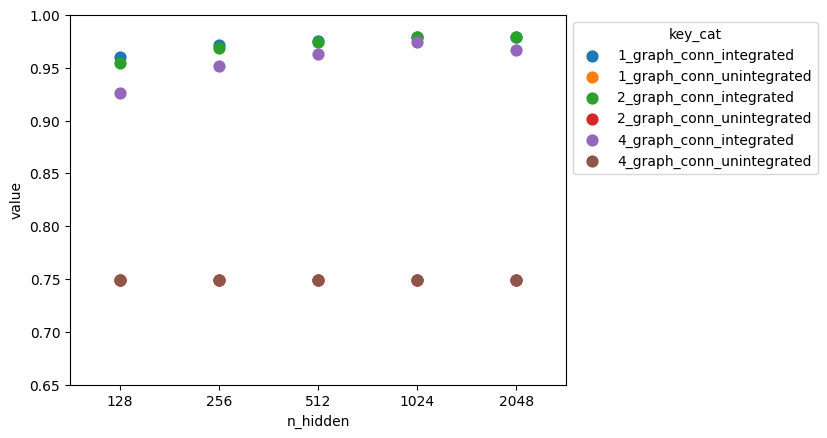

In [480]:
tmp = scib[[x in ['graph_conn_integrated', 'graph_conn_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.65, 1)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.65, 1.0)

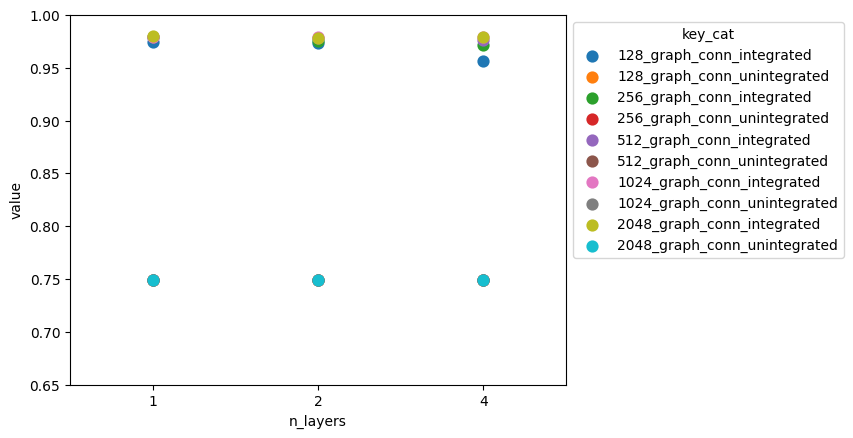

In [542]:
tmp = scib[[x in ['graph_conn_integrated', 'graph_conn_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.65, 1)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.65, 1.0)

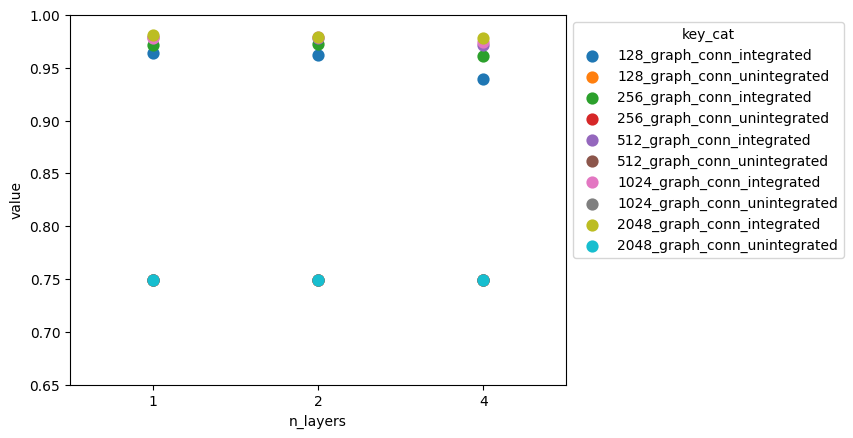

In [543]:
tmp = scib[[x in ['graph_conn_integrated', 'graph_conn_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.65, 1)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.65, 1.0)

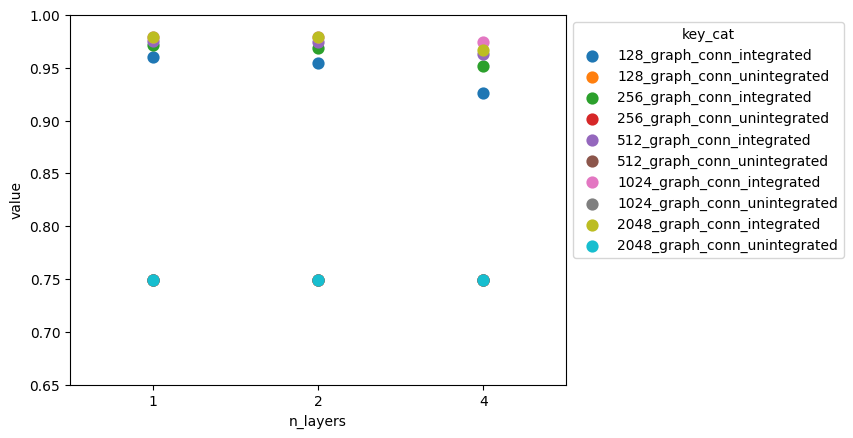

In [545]:
tmp = scib[[x in ['graph_conn_integrated', 'graph_conn_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.65, 1)

## Silhouette

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.3, 0.55)

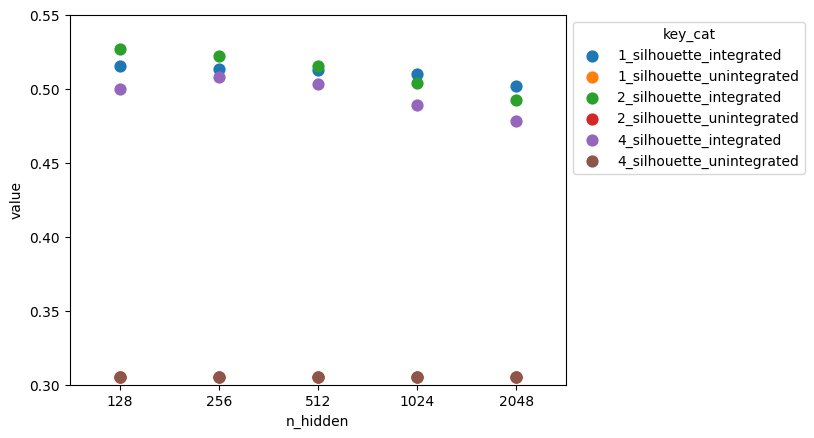

In [481]:
tmp = scib[[x in ['silhouette_integrated', 'silhouette_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.3, 0.55)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.3, 0.55)

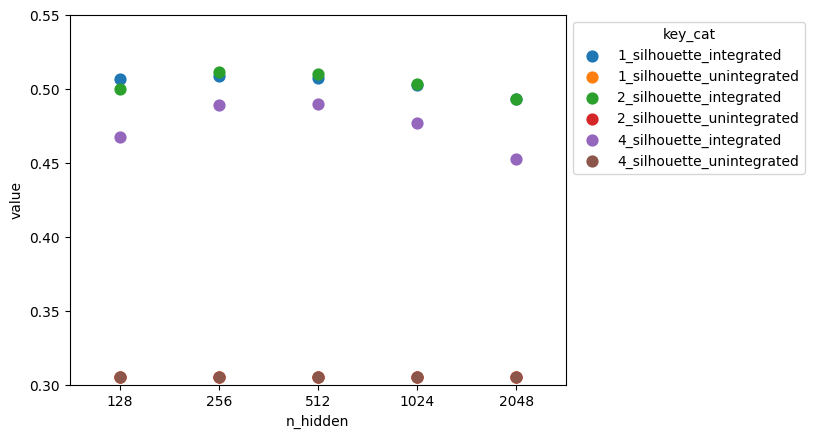

In [482]:
tmp = scib[[x in ['silhouette_integrated', 'silhouette_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.3, 0.55)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.3, 0.55)

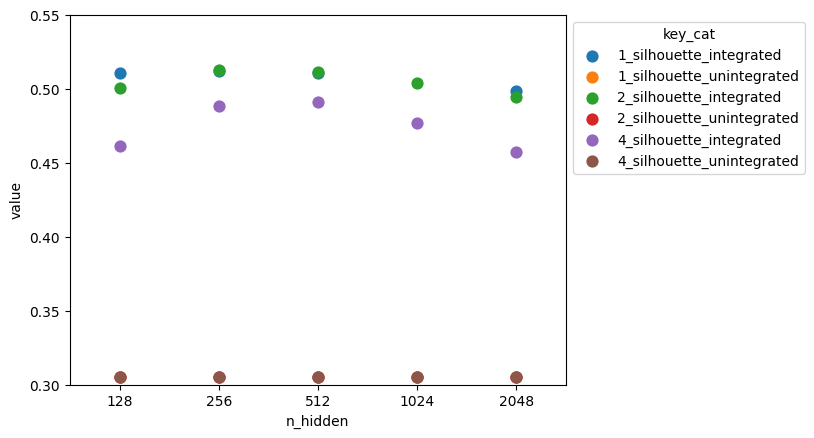

In [483]:
tmp = scib[[x in ['silhouette_integrated', 'silhouette_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.3, 0.55)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.3, 0.55)

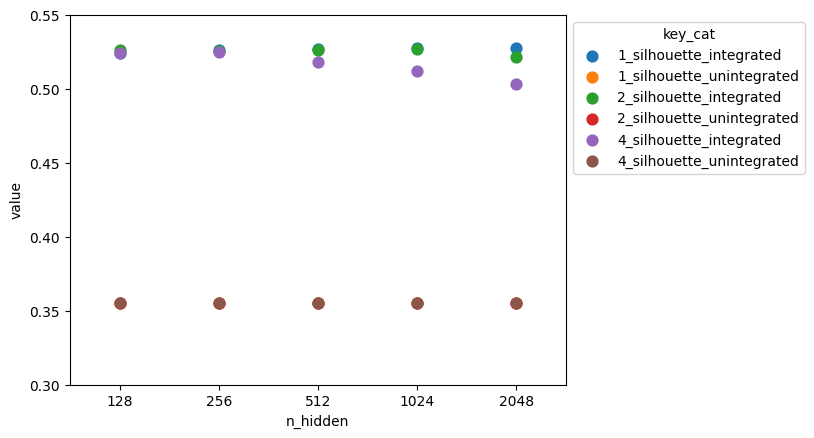

In [484]:
tmp = scib[[x in ['silhouette_integrated', 'silhouette_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.3, 0.55)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.3, 0.55)

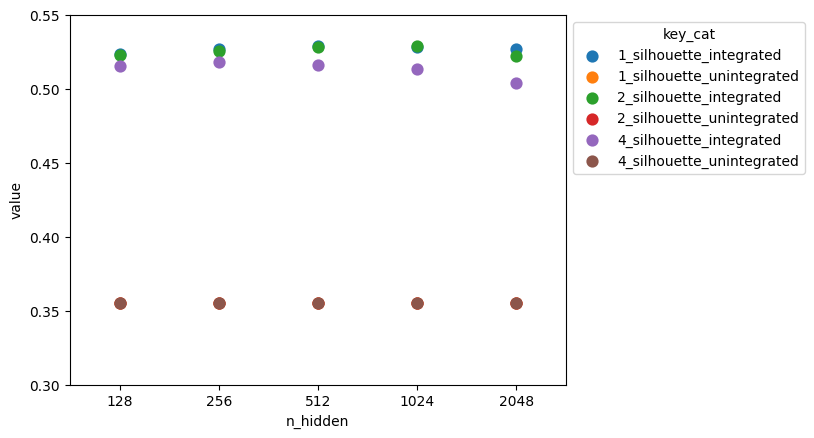

In [485]:
tmp = scib[[x in ['silhouette_integrated', 'silhouette_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.3, 0.55)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.3, 0.55)

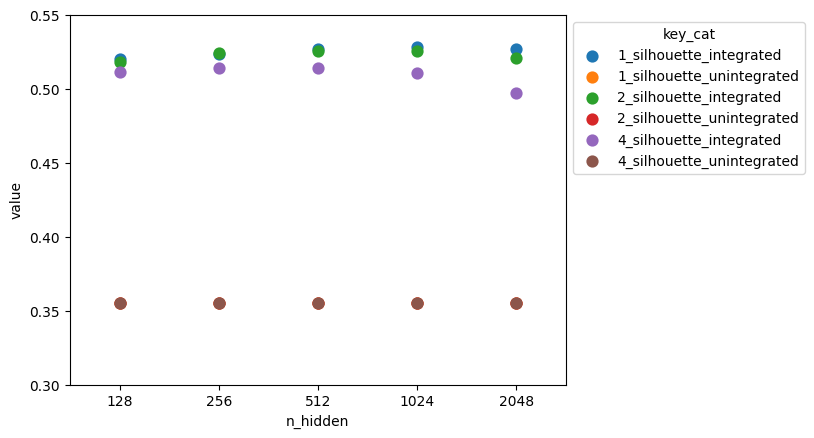

In [486]:
tmp = scib[[x in ['silhouette_integrated', 'silhouette_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.3, 0.55)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.3, 0.55)

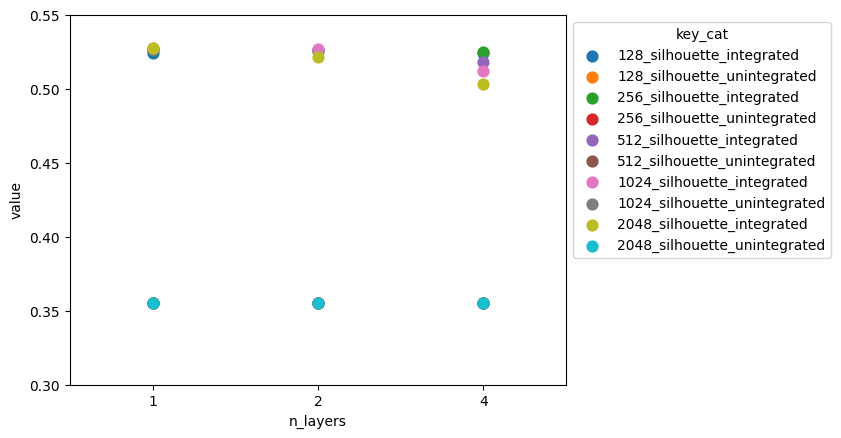

In [546]:
tmp = scib[[x in ['silhouette_integrated', 'silhouette_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.3, 0.55)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.3, 0.55)

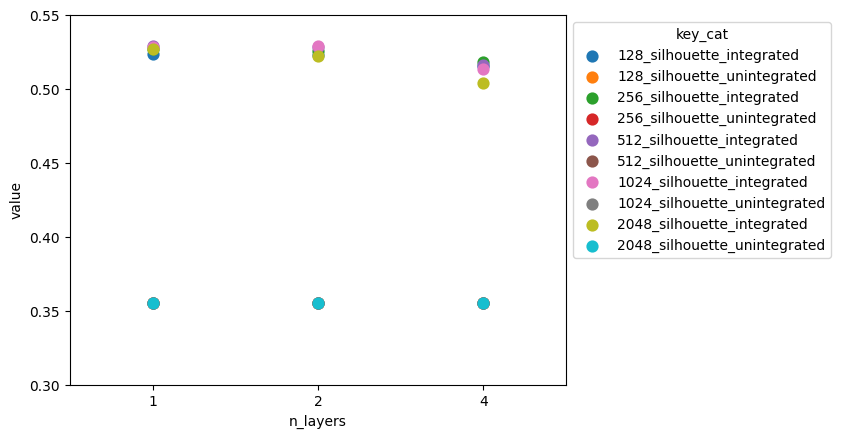

In [547]:
tmp = scib[[x in ['silhouette_integrated', 'silhouette_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.3, 0.55)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.3, 0.55)

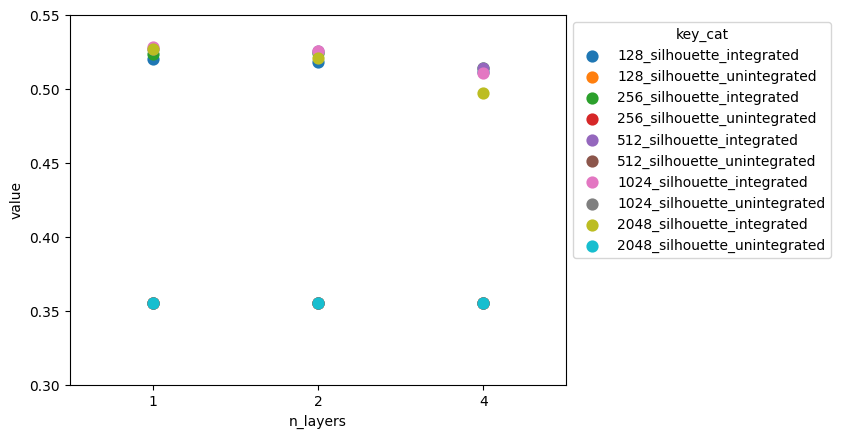

In [548]:
tmp = scib[[x in ['silhouette_integrated', 'silhouette_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.3, 0.55)

## silhouette score for batch correction

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.95)

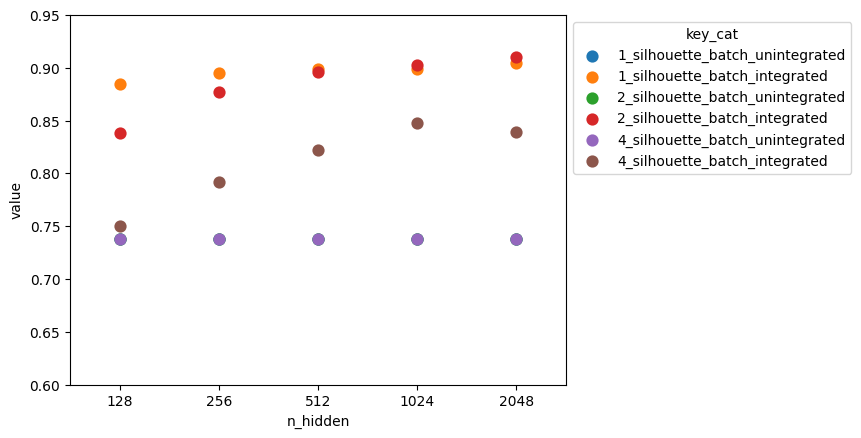

In [487]:
tmp = scib[[x in ['silhouette_batch_unintegrated', 'silhouette_batch_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.95)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.95)

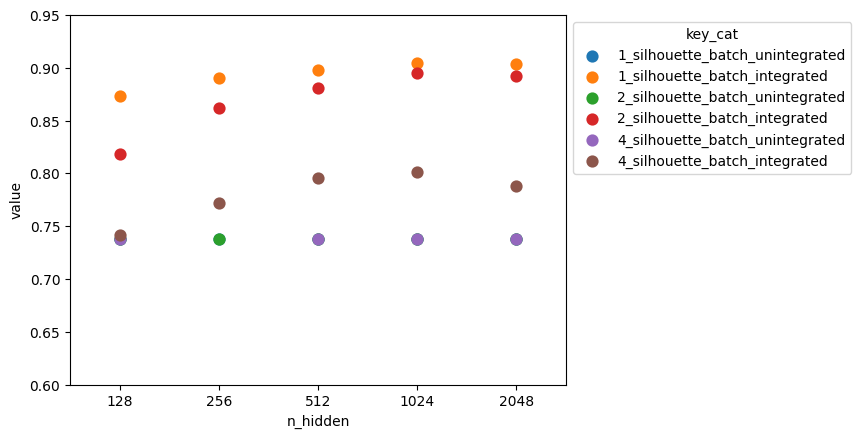

In [488]:
tmp = scib[[x in ['silhouette_batch_unintegrated', 'silhouette_batch_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.95)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.95)

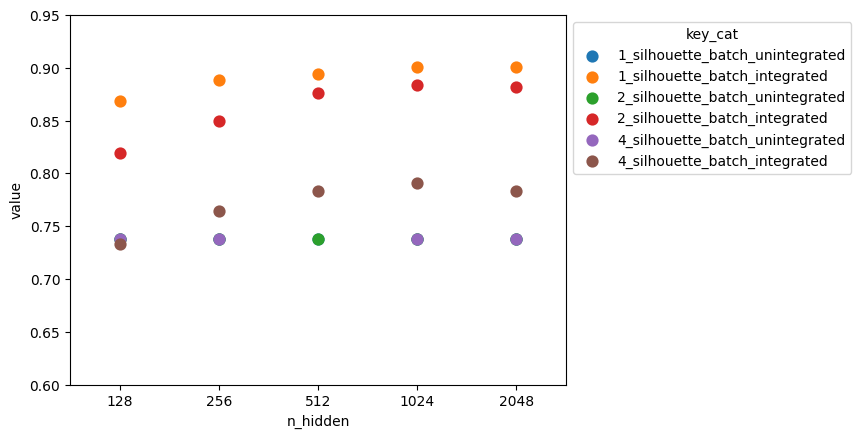

In [489]:
tmp = scib[[x in ['silhouette_batch_unintegrated', 'silhouette_batch_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.95)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.95)

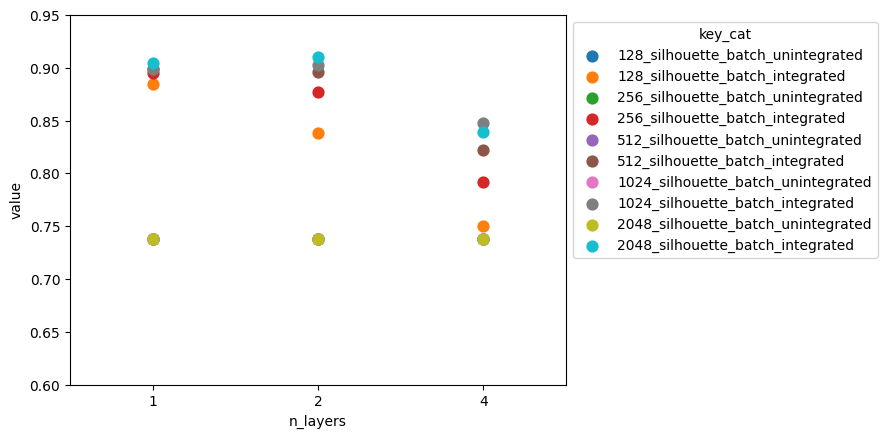

In [573]:
tmp = scib[[x in ['silhouette_batch_unintegrated', 'silhouette_batch_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.95)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.95)

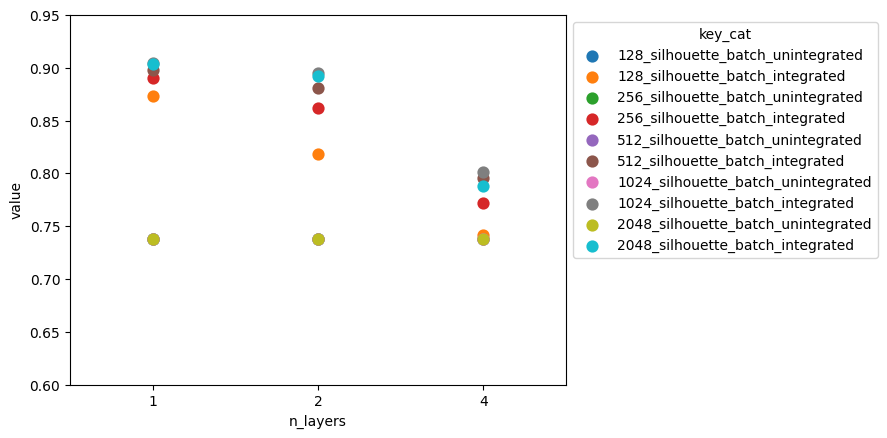

In [574]:
tmp = scib[[x in ['silhouette_batch_unintegrated', 'silhouette_batch_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.95)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.95)

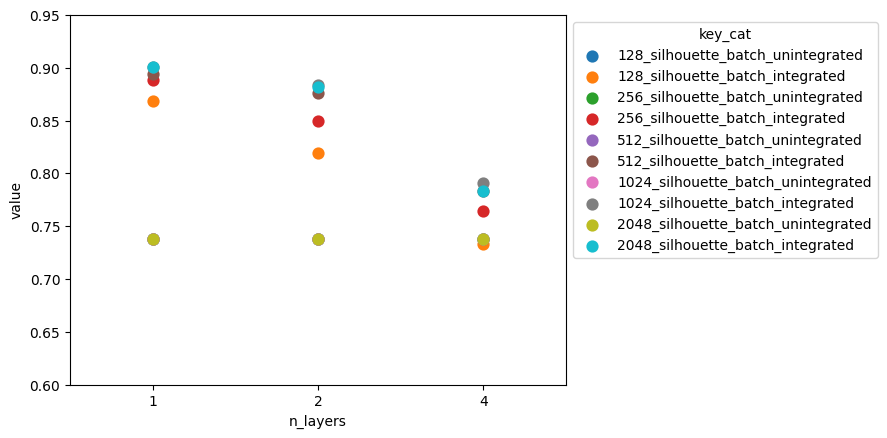

In [575]:
tmp = scib[[x in ['silhouette_batch_unintegrated', 'silhouette_batch_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.95)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.95)

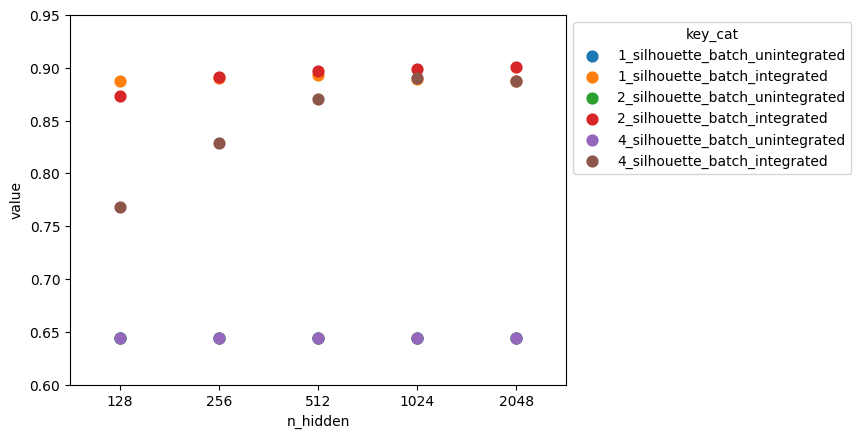

In [490]:
tmp = scib[[x in ['silhouette_batch_unintegrated', 'silhouette_batch_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.95)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.95)

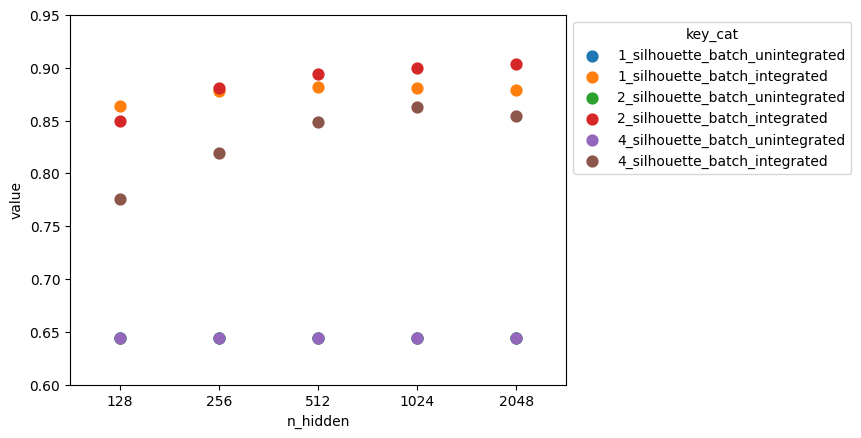

In [491]:
tmp = scib[[x in ['silhouette_batch_unintegrated', 'silhouette_batch_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.95)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.95)

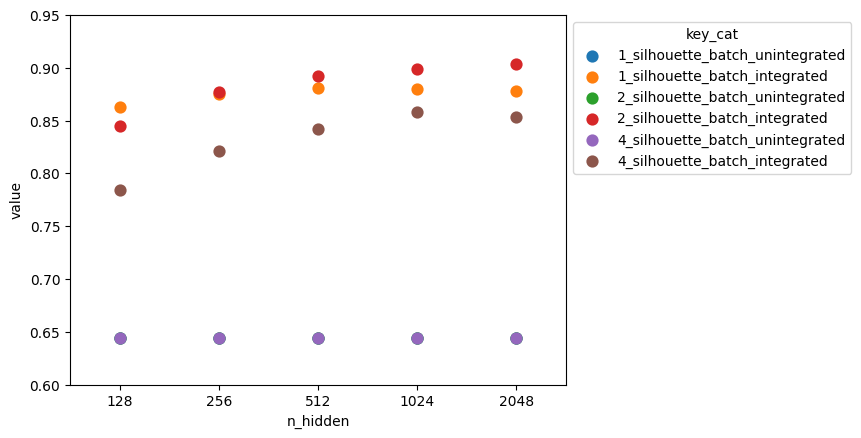

In [492]:
tmp = scib[[x in ['silhouette_batch_unintegrated', 'silhouette_batch_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.95)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.95)

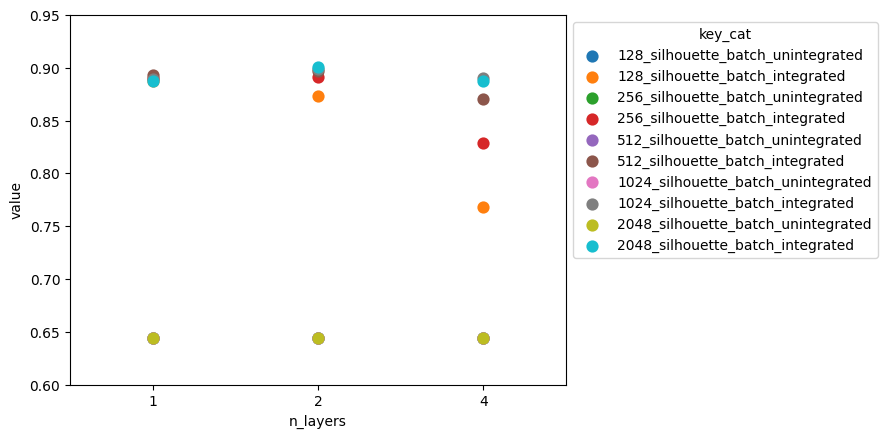

In [549]:
tmp = scib[[x in ['silhouette_batch_unintegrated', 'silhouette_batch_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.95)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.95)

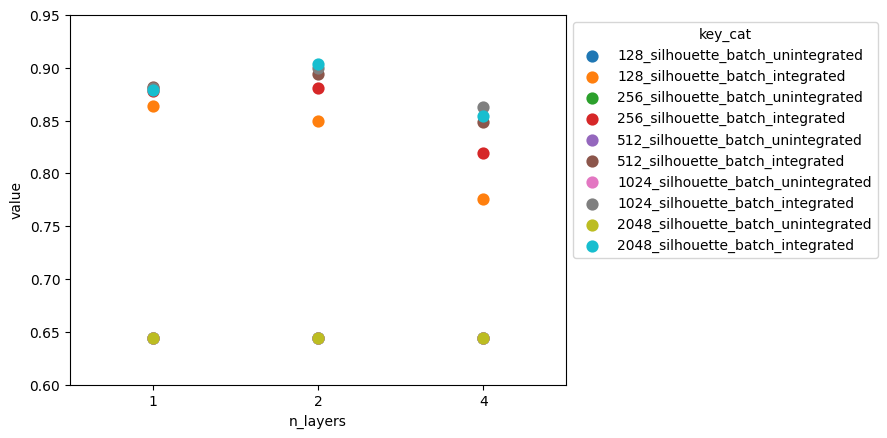

In [550]:
tmp = scib[[x in ['silhouette_batch_unintegrated', 'silhouette_batch_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.95)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.6, 0.95)

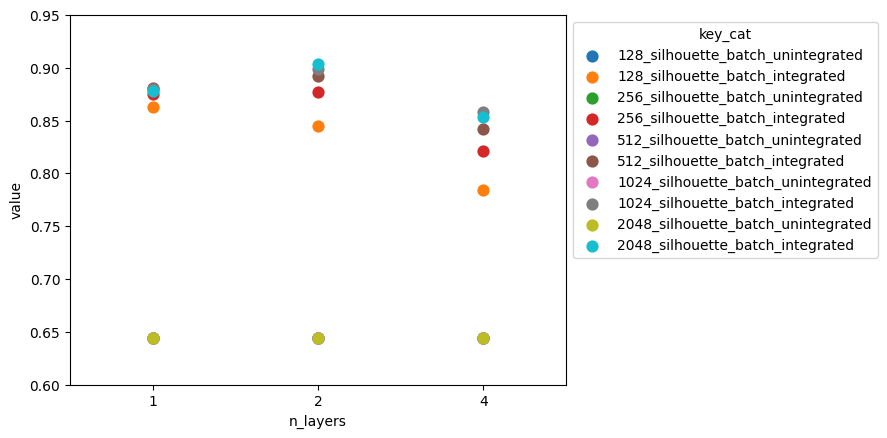

In [551]:
tmp = scib[[x in ['silhouette_batch_unintegrated', 'silhouette_batch_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.6, 0.95)

## Average Silhouette Width (ASW) for iso labels

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.45, 0.8)

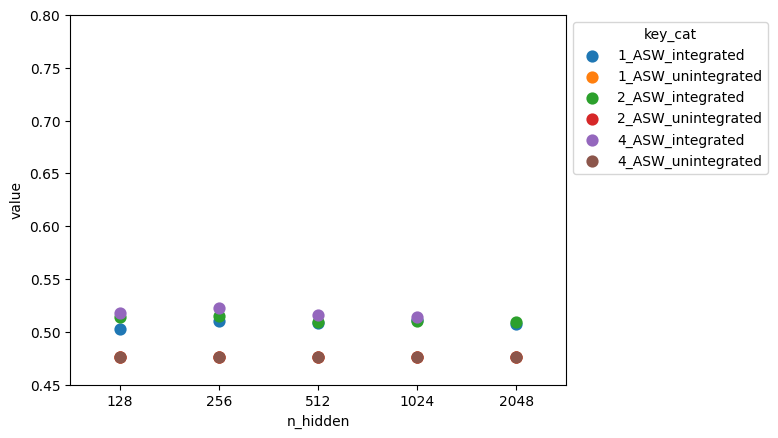

In [493]:
tmp = scib[[x in ['ASW_integrated', 'ASW_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.45, 0.8)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.45, 0.8)

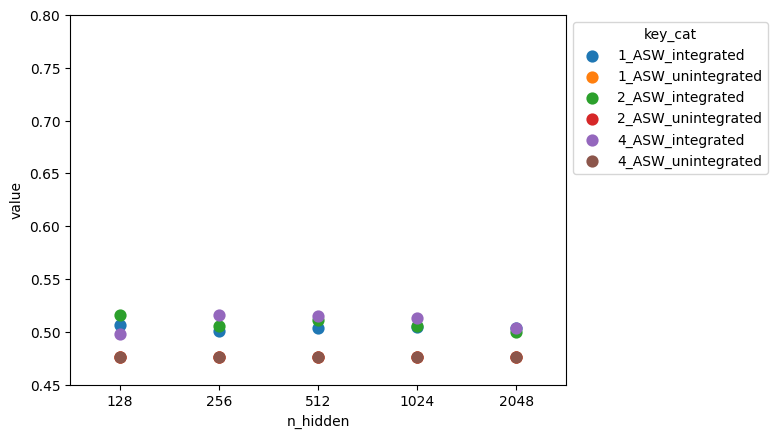

In [494]:
tmp = scib[[x in ['ASW_integrated', 'ASW_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.45, 0.8)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.45, 0.8)

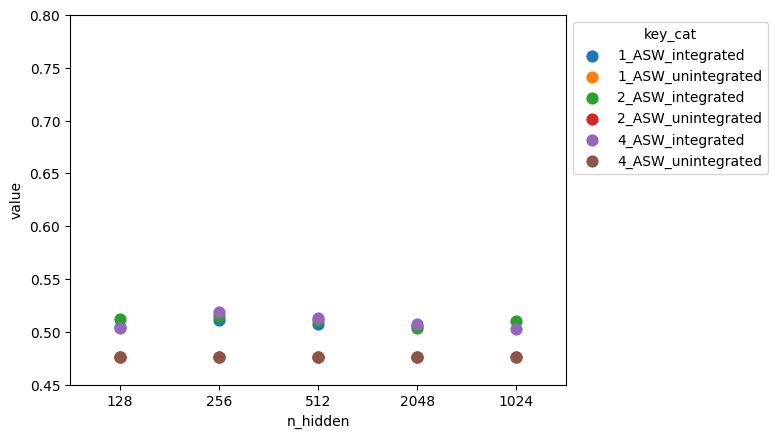

In [495]:
tmp = scib[[x in ['ASW_integrated', 'ASW_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.45, 0.8)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.45, 0.8)

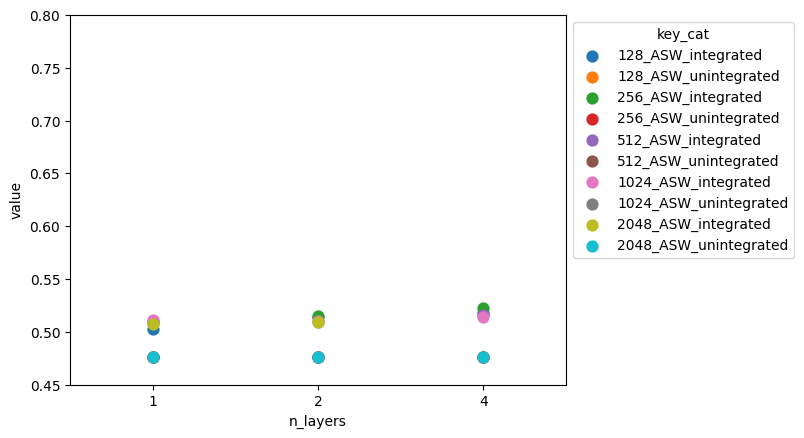

In [570]:
tmp = scib[[x in ['ASW_integrated', 'ASW_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.45, 0.8)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.45, 0.8)

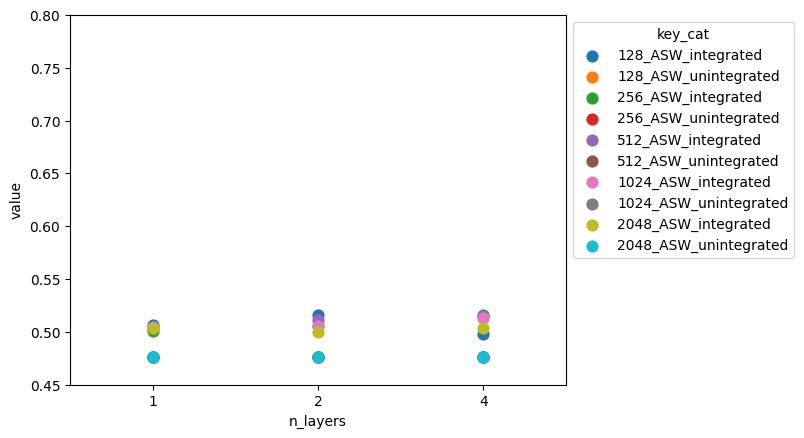

In [571]:
tmp = scib[[x in ['ASW_integrated', 'ASW_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.45, 0.8)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.45, 0.8)

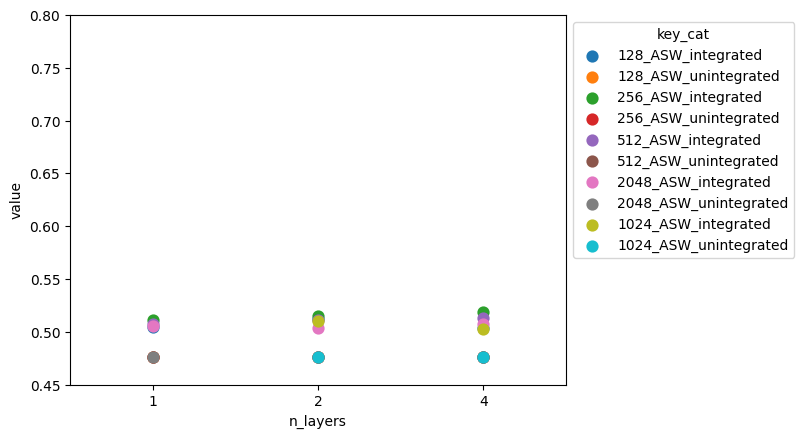

In [572]:
tmp = scib[[x in ['ASW_integrated', 'ASW_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.45, 0.8)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.45, 0.8)

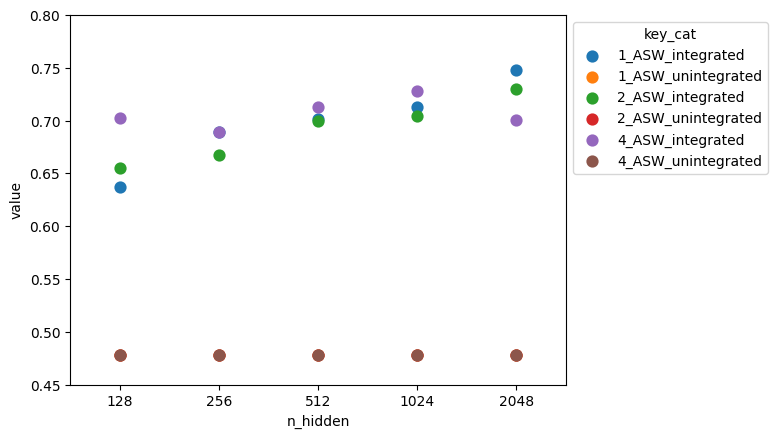

In [496]:
tmp = scib[[x in ['ASW_integrated', 'ASW_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.45, 0.8)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.45, 0.8)

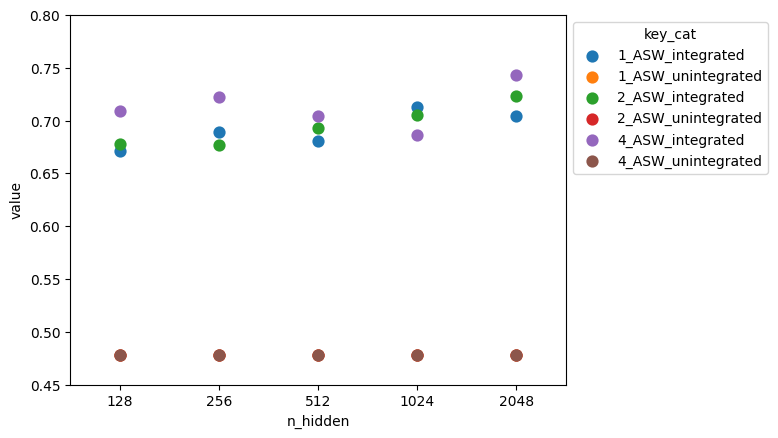

In [497]:
tmp = scib[[x in ['ASW_integrated', 'ASW_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.45, 0.8)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.45, 0.8)

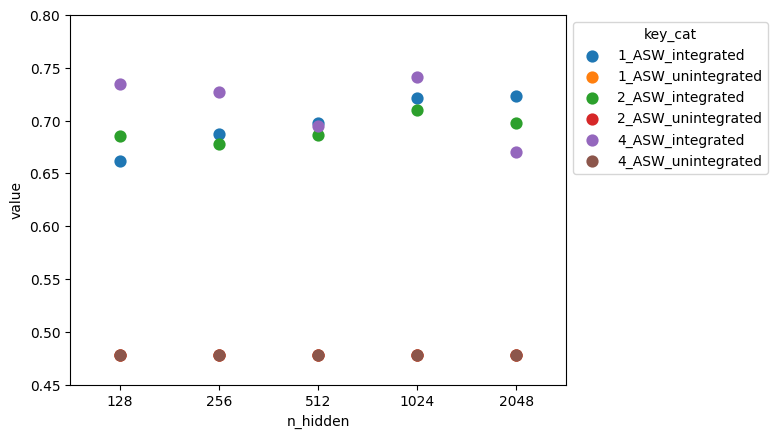

In [498]:
tmp = scib[[x in ['ASW_integrated', 'ASW_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.45, 0.8)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.45, 0.8)

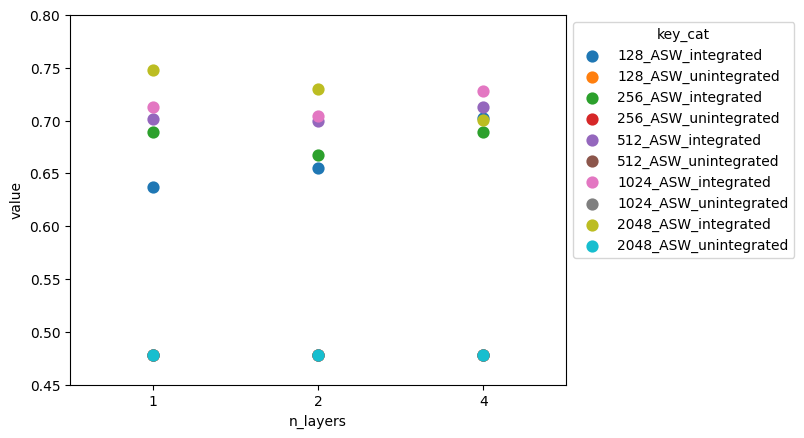

In [552]:
tmp = scib[[x in ['ASW_integrated', 'ASW_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.45, 0.8)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.45, 0.8)

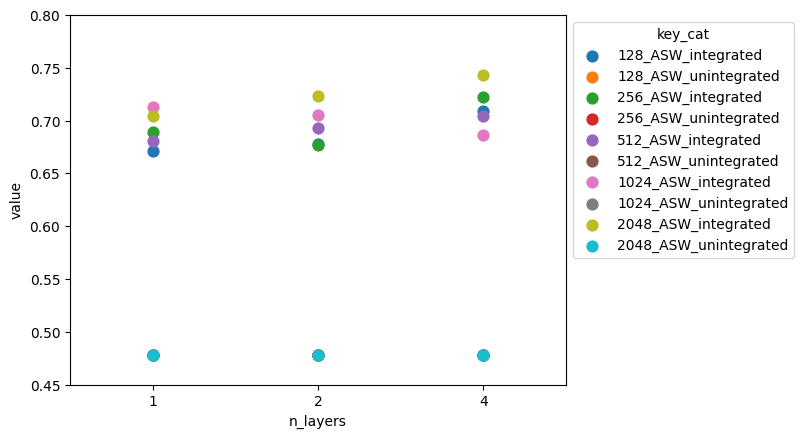

In [553]:
tmp = scib[[x in ['ASW_integrated', 'ASW_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.45, 0.8)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.45, 0.8)

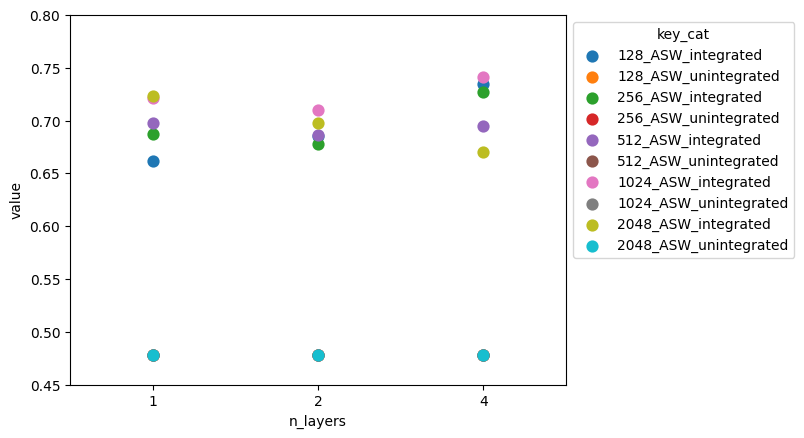

In [554]:
tmp = scib[[x in ['ASW_integrated', 'ASW_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.45, 0.8)

## cLISI

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

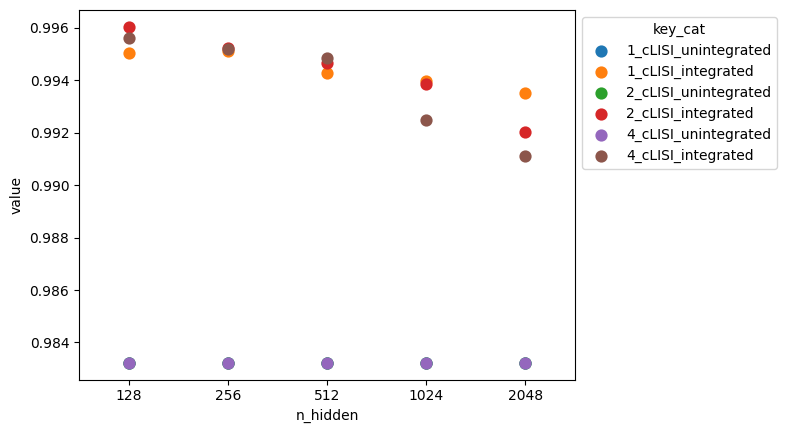

In [499]:
tmp = scib[[x in ['cLISI_integrated', 'cLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

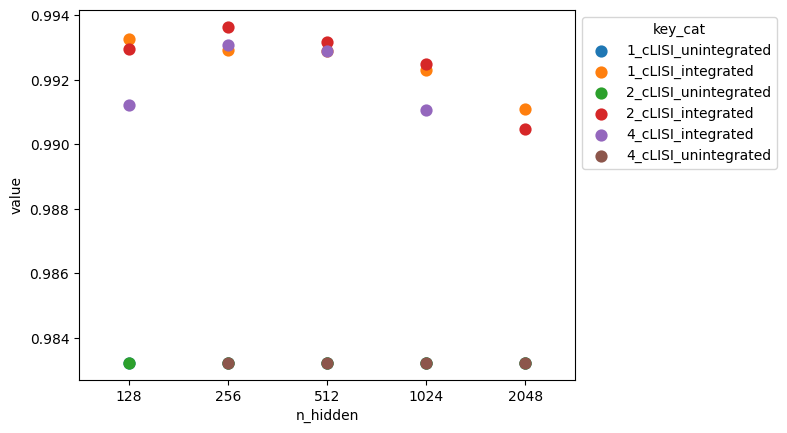

In [500]:
tmp = scib[[x in ['cLISI_integrated', 'cLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

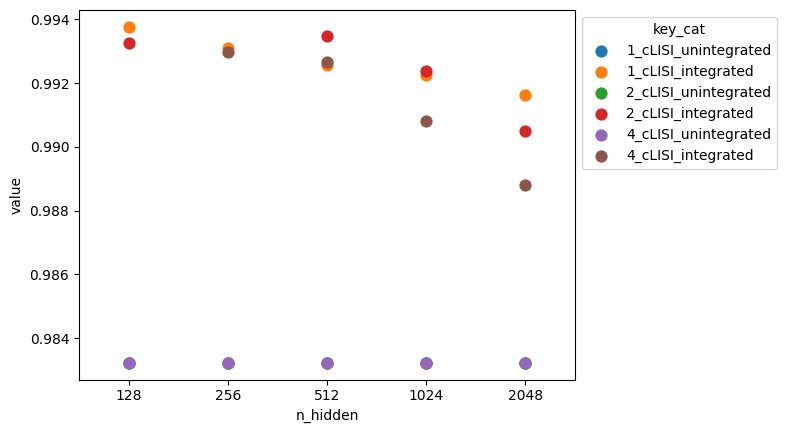

In [501]:
tmp = scib[[x in ['cLISI_integrated', 'cLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

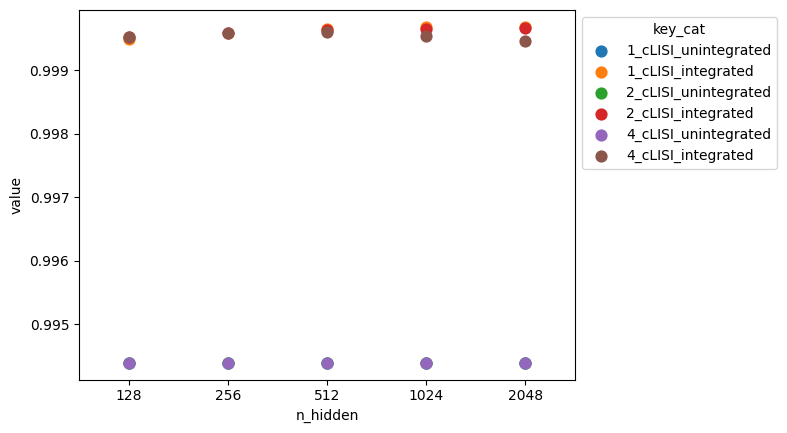

In [502]:
tmp = scib[[x in ['cLISI_integrated', 'cLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

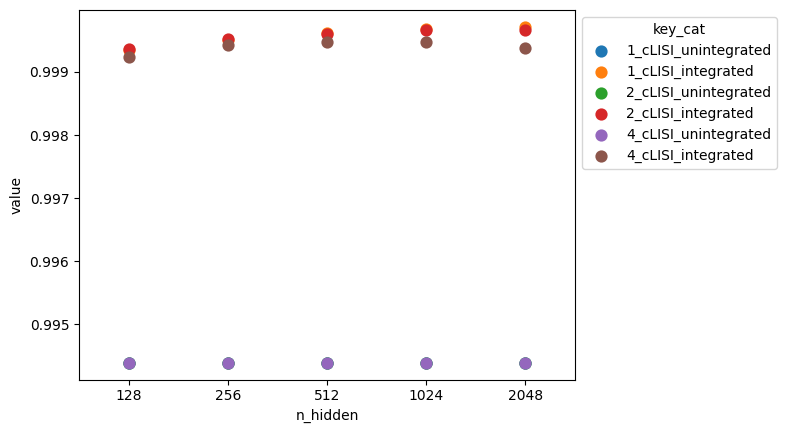

In [503]:
tmp = scib[[x in ['cLISI_integrated', 'cLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

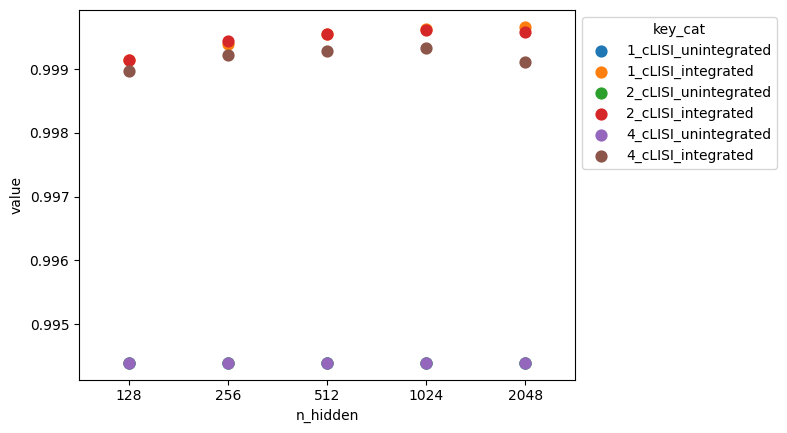

In [504]:
tmp = scib[[x in ['cLISI_integrated', 'cLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

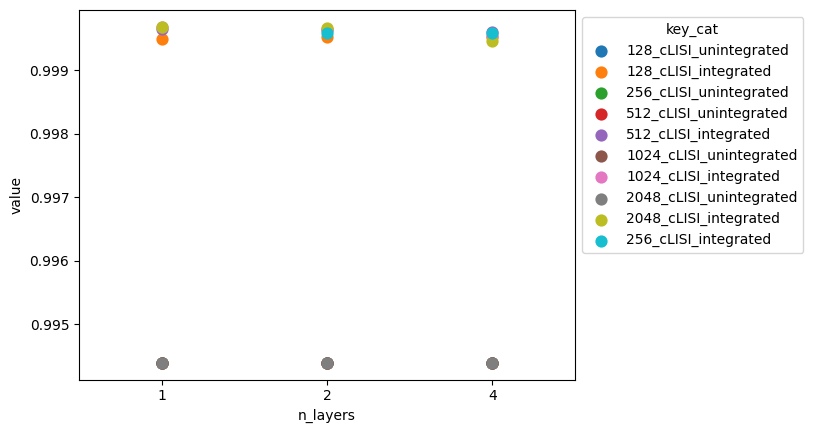

In [555]:
tmp = scib[[x in ['cLISI_integrated', 'cLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

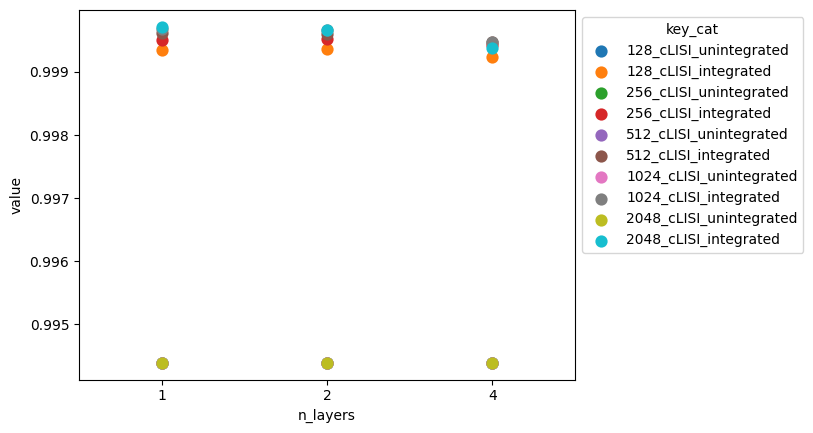

In [556]:
tmp = scib[[x in ['cLISI_integrated', 'cLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

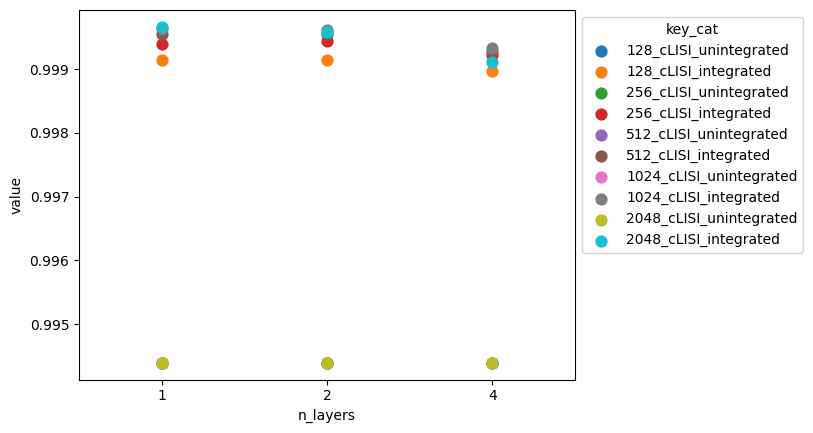

In [557]:
tmp = scib[[x in ['cLISI_integrated', 'cLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

## iLISI

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.05, 0.12)

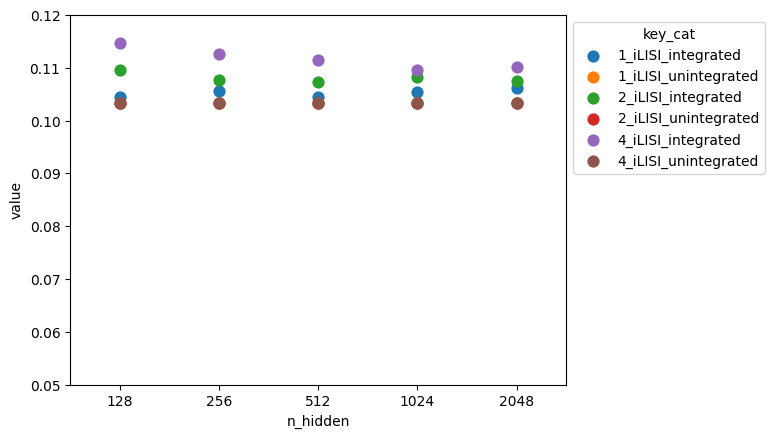

In [505]:
tmp = scib[[x in ['iLISI_integrated', 'iLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.05, 0.12)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.05, 0.12)

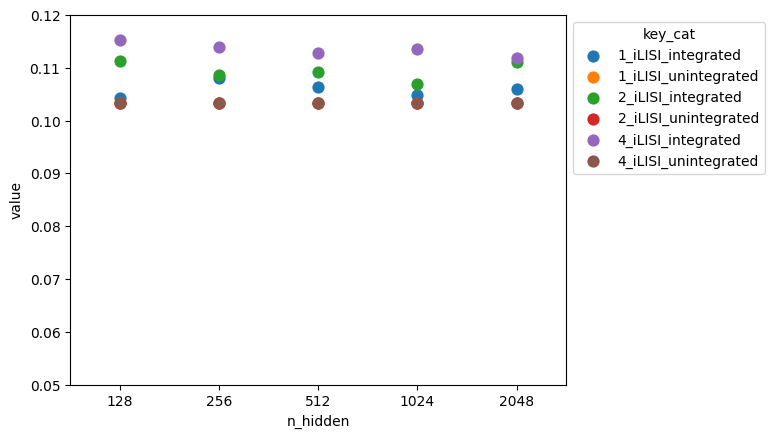

In [506]:
tmp = scib[[x in ['iLISI_integrated', 'iLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.05, 0.12)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.05, 0.12)

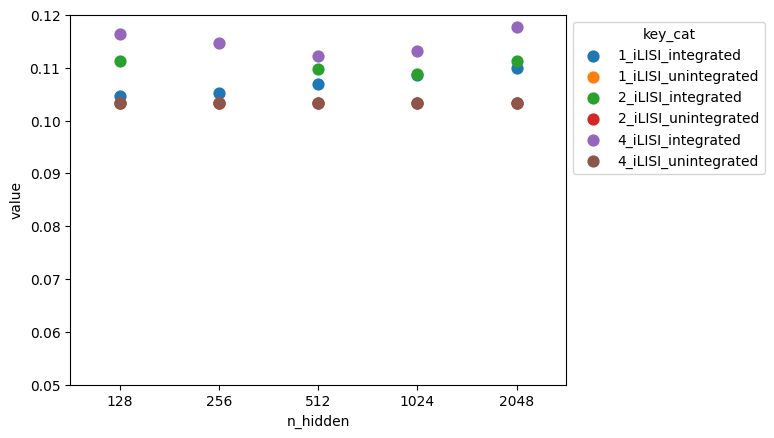

In [507]:
tmp = scib[[x in ['iLISI_integrated', 'iLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.05, 0.12)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.05, 0.12)

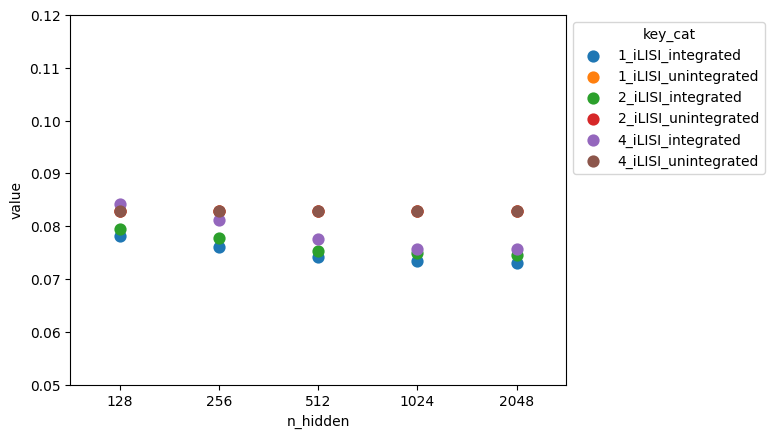

In [508]:
tmp = scib[[x in ['iLISI_integrated', 'iLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.05, 0.12)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.05, 0.12)

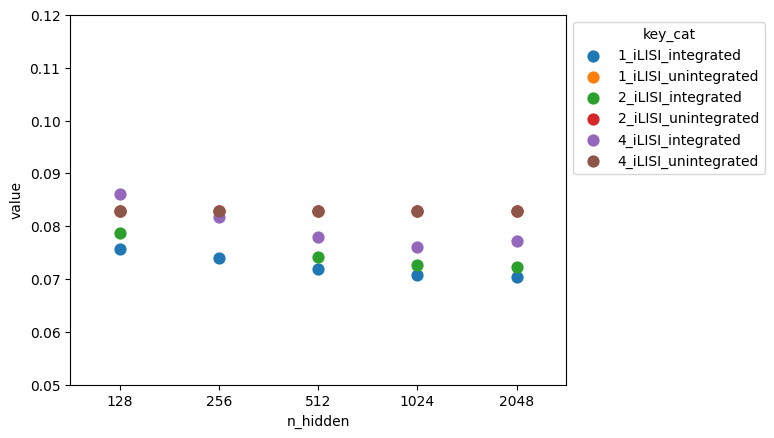

In [509]:
tmp = scib[[x in ['iLISI_integrated', 'iLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.05, 0.12)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.05, 0.12)

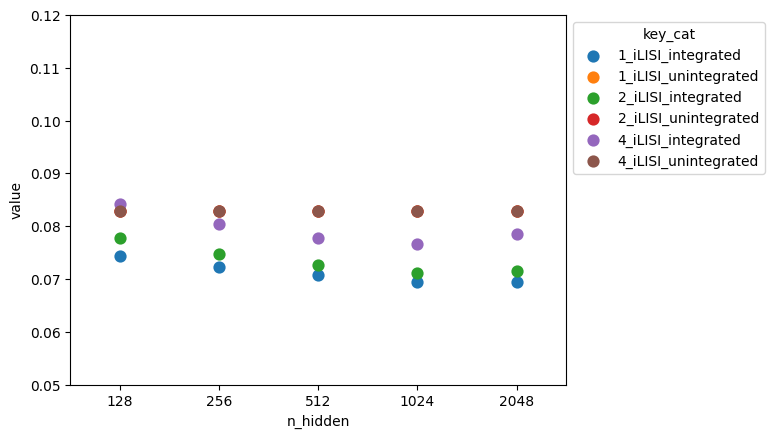

In [510]:
tmp = scib[[x in ['iLISI_integrated', 'iLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.05, 0.12)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.05, 0.12)

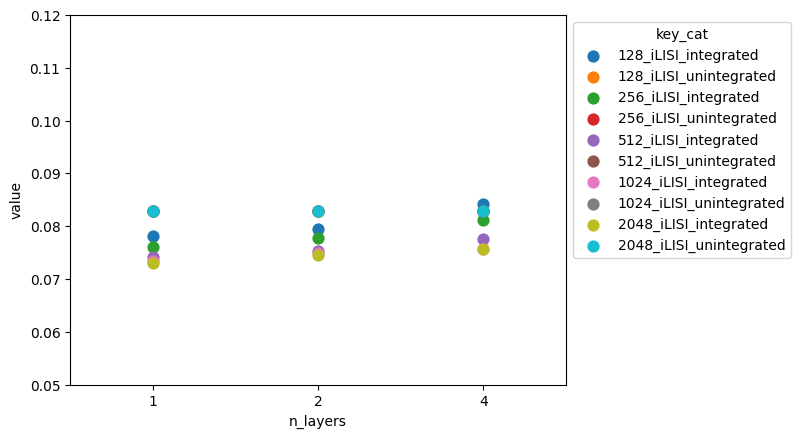

In [558]:
tmp = scib[[x in ['iLISI_integrated', 'iLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.05, 0.12)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.05, 0.12)

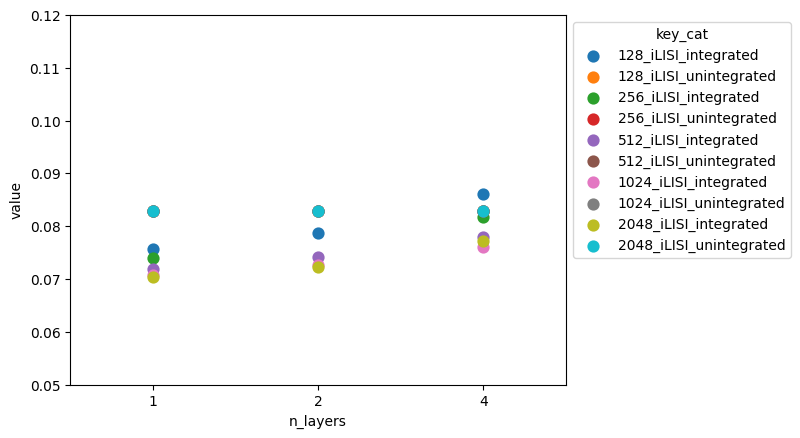

In [559]:
tmp = scib[[x in ['iLISI_integrated', 'iLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.05, 0.12)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.05, 0.12)

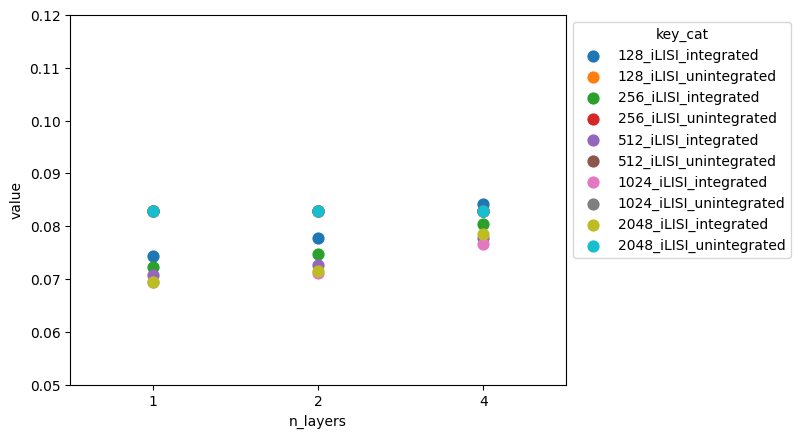

In [560]:
tmp = scib[[x in ['iLISI_integrated', 'iLISI_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.05, 0.12)

## isolated Label F1

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.05)

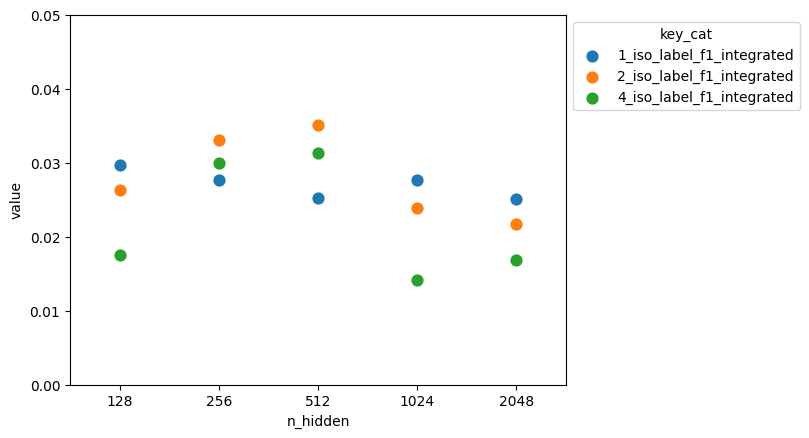

In [511]:
tmp = scib[[x in ['iso_label_f1_integrated', 'iso_label_f1_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.0, 0.05)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.05)

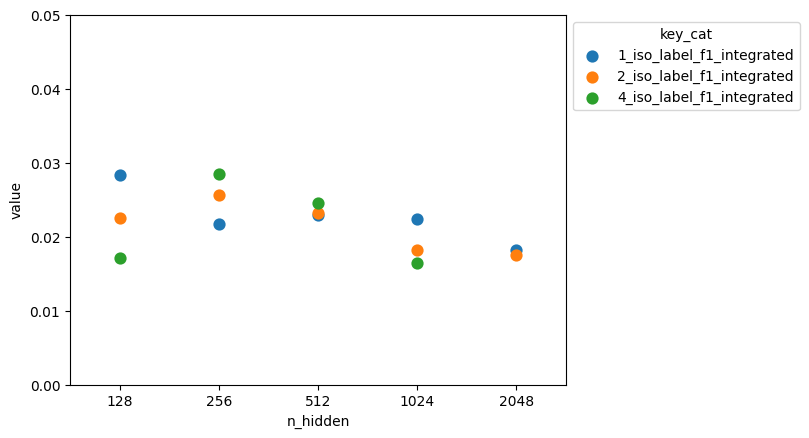

In [512]:
tmp = scib[[x in ['iso_label_f1_integrated', 'iso_label_f1_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.0, 0.05)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.05)

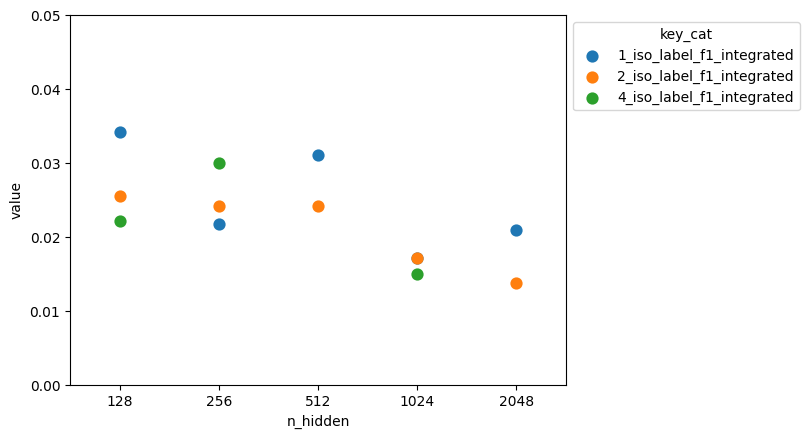

In [513]:
tmp = scib[[x in ['iso_label_f1_integrated', 'iso_label_f1_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.0, 0.05)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.05)

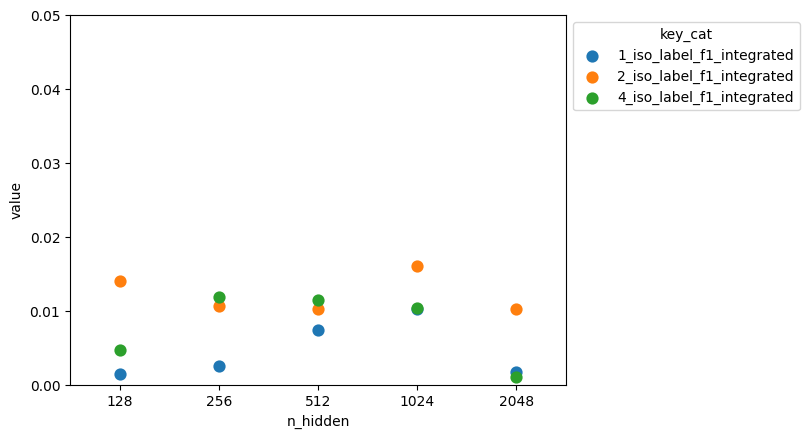

In [514]:
tmp = scib[[x in ['iso_label_f1_integrated', 'iso_label_f1_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.0, 0.05)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.05)

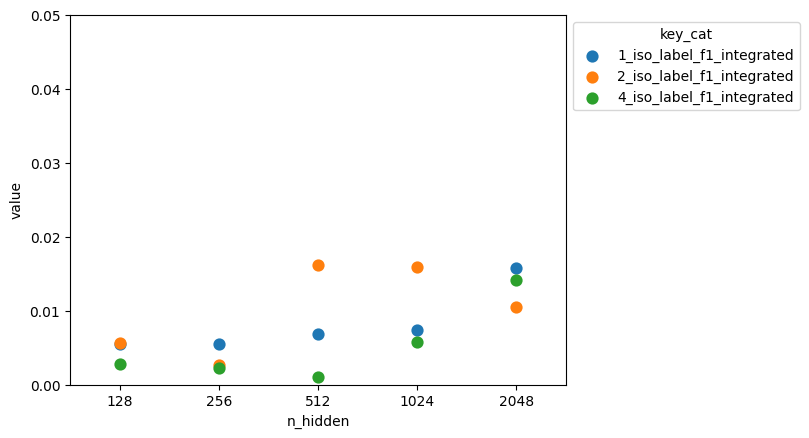

In [515]:
tmp = scib[[x in ['iso_label_f1_integrated', 'iso_label_f1_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.0, 0.05)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.05)

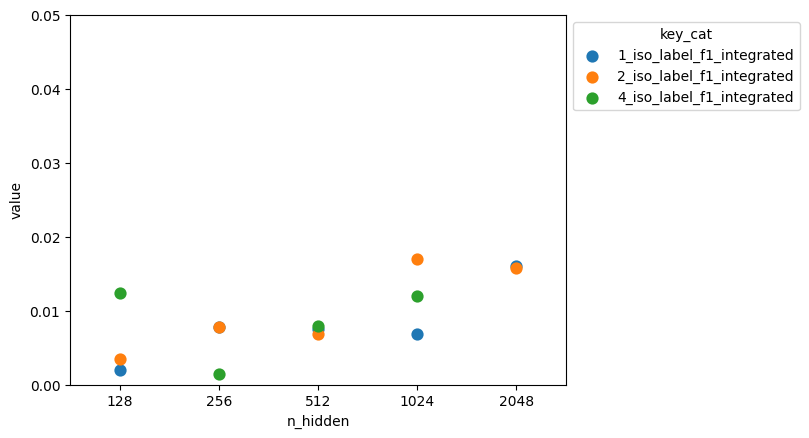

In [516]:
tmp = scib[[x in ['iso_label_f1_integrated', 'iso_label_f1_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.0, 0.05)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.05)

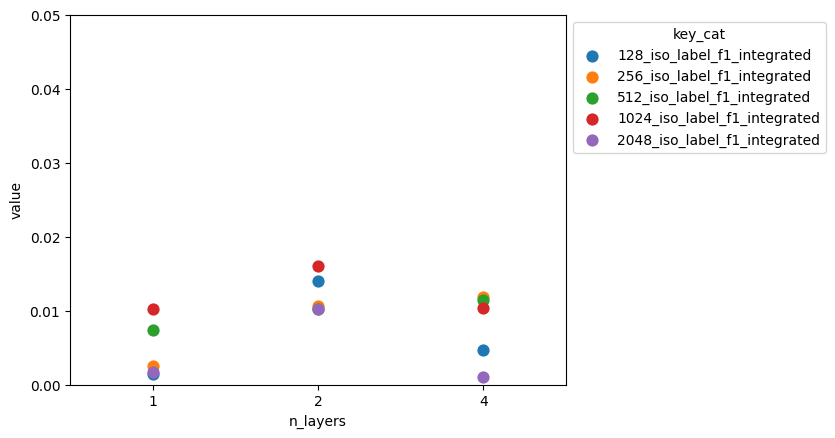

In [561]:
tmp = scib[[x in ['iso_label_f1_integrated', 'iso_label_f1_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.0, 0.05)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.05)

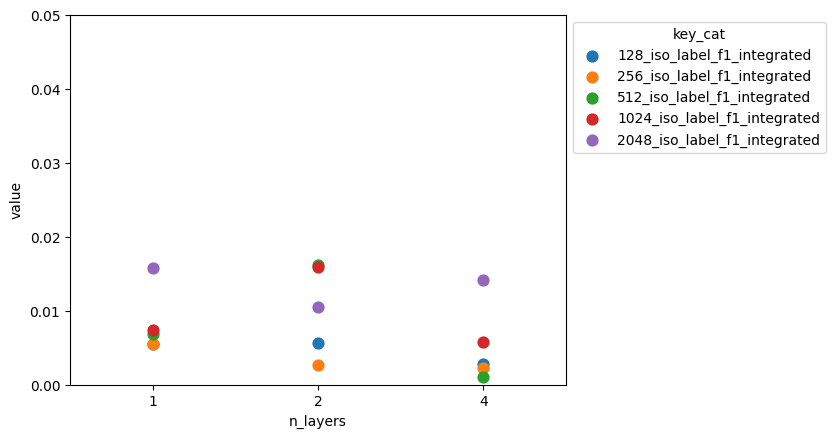

In [562]:
tmp = scib[[x in ['iso_label_f1_integrated', 'iso_label_f1_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.0, 0.05)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.0, 0.05)

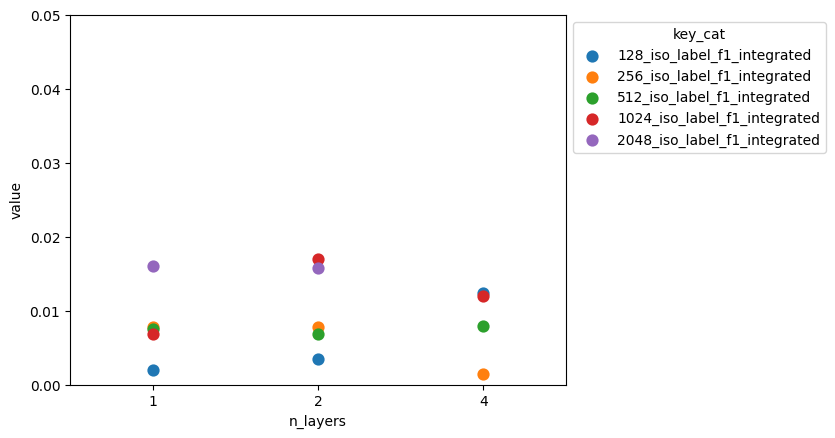

In [563]:
tmp = scib[[x in ['iso_label_f1_integrated', 'iso_label_f1_integrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.0, 0.05)

## Adjusted Rand Index

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.2, 0.65)

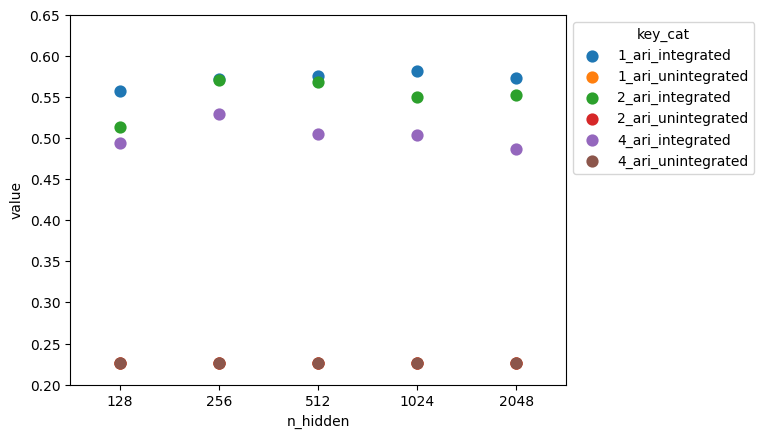

In [517]:
tmp = scib[[x in ['ari_integrated', 'ari_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.2, 0.65)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.2, 0.65)

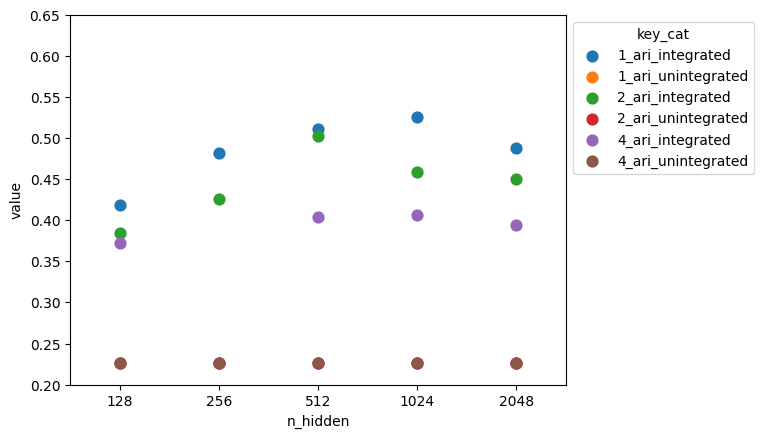

In [518]:
tmp = scib[[x in ['ari_integrated', 'ari_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.2, 0.65)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.2, 0.65)

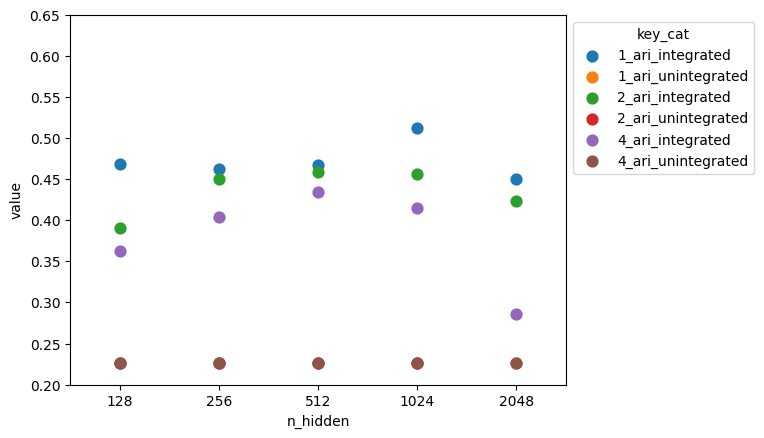

In [519]:
tmp = scib[[x in ['ari_integrated', 'ari_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.2, 0.65)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.2, 0.65)

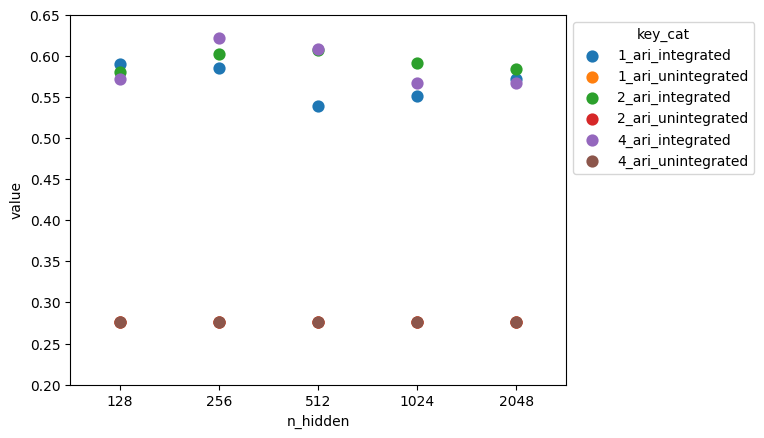

In [520]:
tmp = scib[[x in ['ari_integrated', 'ari_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.2, 0.65)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.2, 0.65)

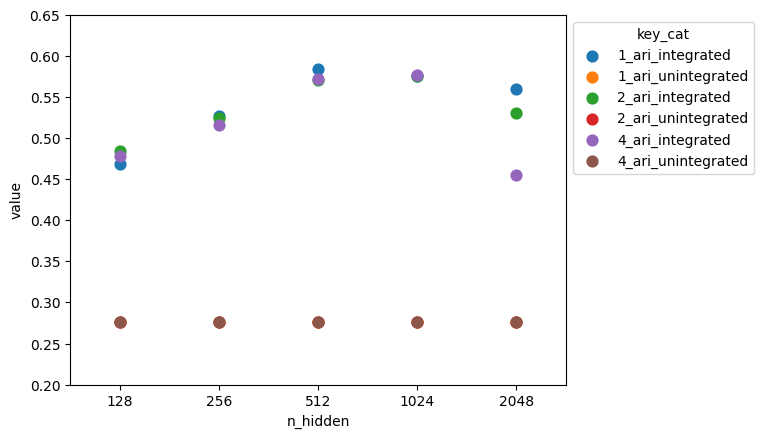

In [521]:
tmp = scib[[x in ['ari_integrated', 'ari_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.2, 0.65)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.2, 0.65)

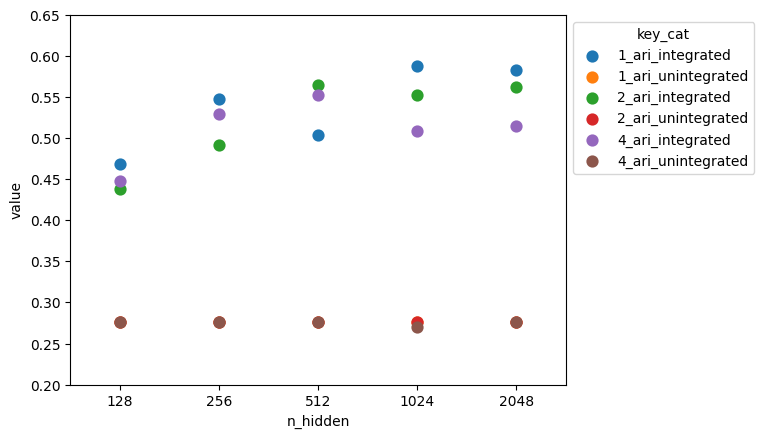

In [522]:
tmp = scib[[x in ['ari_integrated', 'ari_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.2, 0.65)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.2, 0.65)

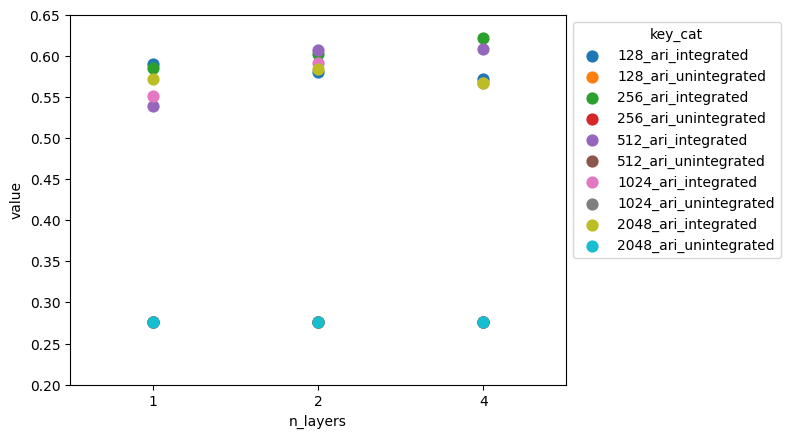

In [564]:
tmp = scib[[x in ['ari_integrated', 'ari_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.2, 0.65)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.2, 0.65)

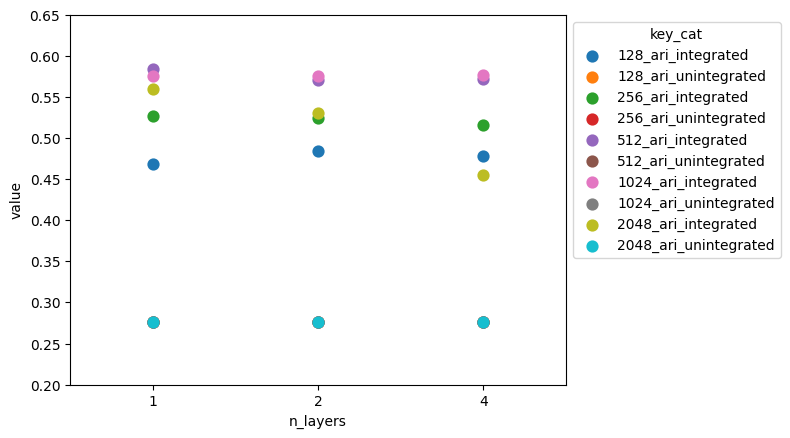

In [565]:
tmp = scib[[x in ['ari_integrated', 'ari_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.2, 0.65)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.2, 0.65)

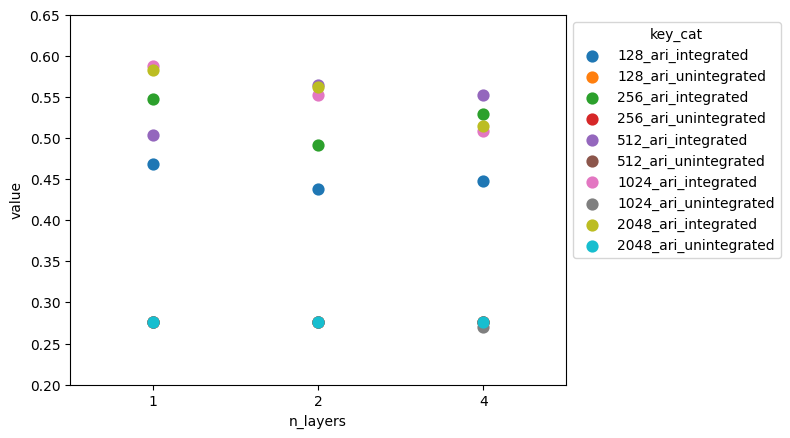

In [566]:
tmp = scib[[x in ['ari_integrated', 'ari_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.2, 0.65)

## Normalized mutual information

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.5, 0.85)

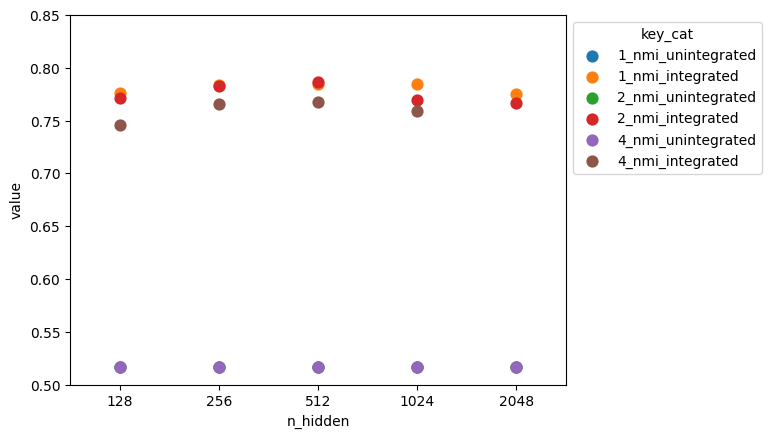

In [523]:
tmp = scib[[x in ['nmi_integrated', 'nmi_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.5, 0.85)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.5, 0.85)

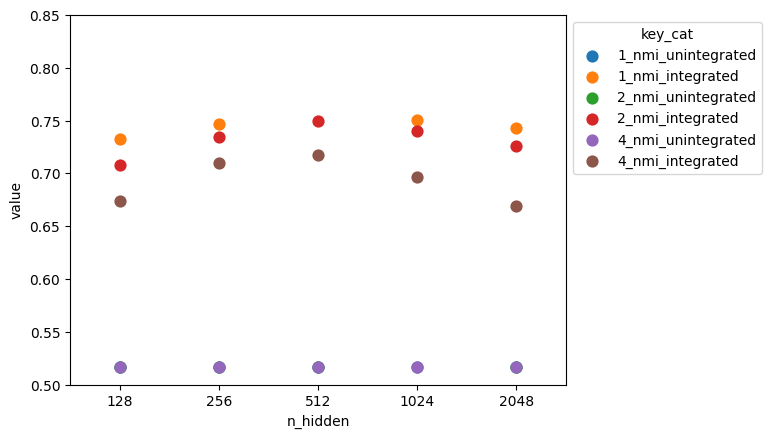

In [524]:
tmp = scib[[x in ['nmi_integrated', 'nmi_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.5, 0.85)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.5, 0.85)

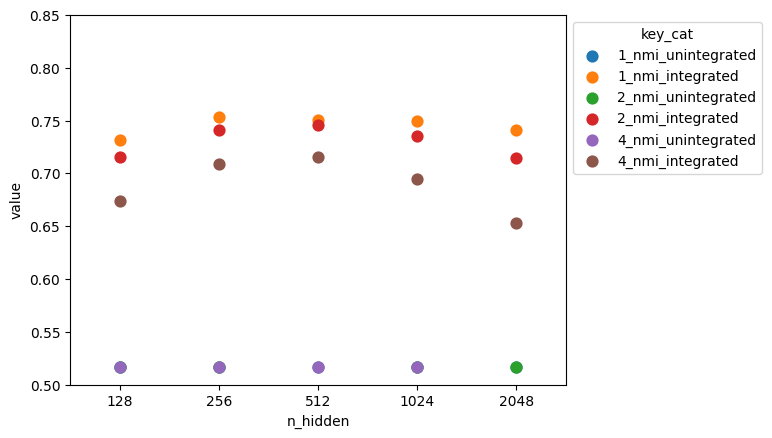

In [525]:
tmp = scib[[x in ['nmi_integrated', 'nmi_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='10k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.5, 0.85)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.5, 0.85)

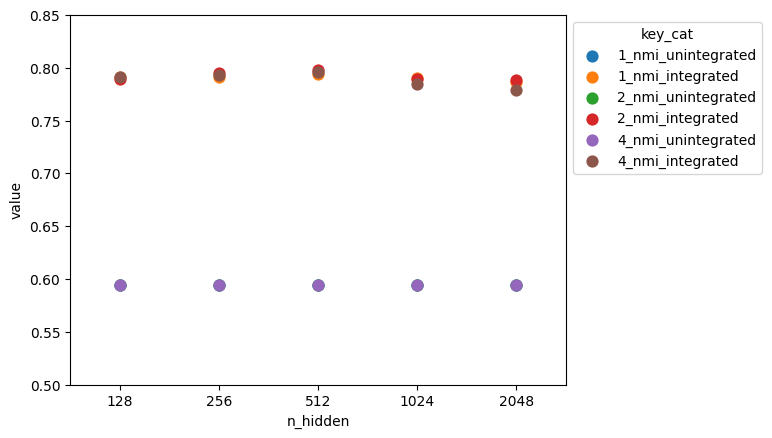

In [526]:
tmp = scib[[x in ['nmi_integrated', 'nmi_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.5, 0.85)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.5, 0.85)

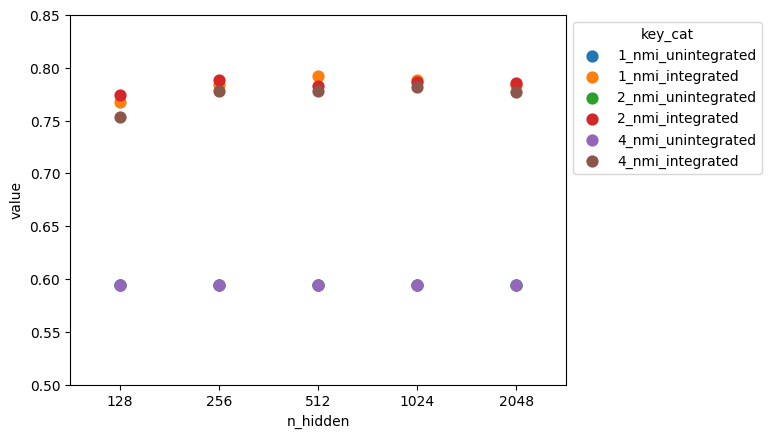

In [527]:
tmp = scib[[x in ['nmi_integrated', 'nmi_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.5, 0.85)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.5, 0.85)

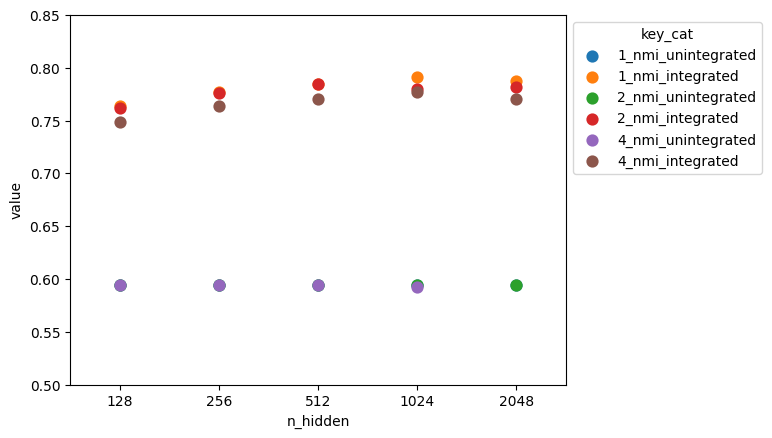

In [528]:
tmp = scib[[x in ['nmi_integrated', 'nmi_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_layers']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_hidden', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.5, 0.85)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.5, 0.85)

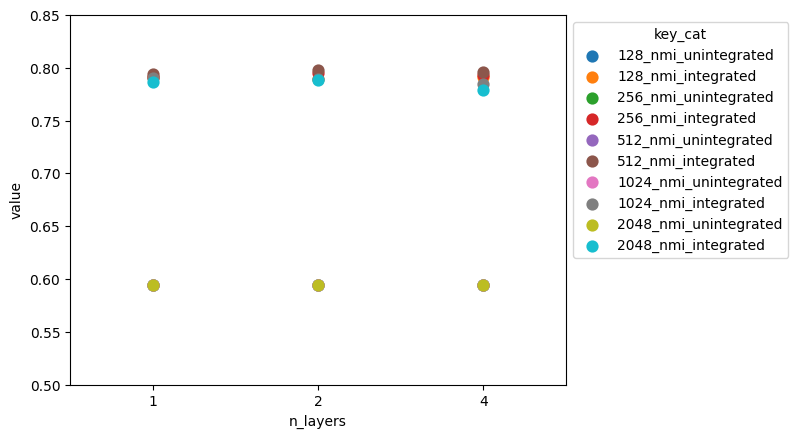

In [567]:
tmp = scib[[x in ['nmi_integrated', 'nmi_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='2k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.5, 0.85)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.5, 0.85)

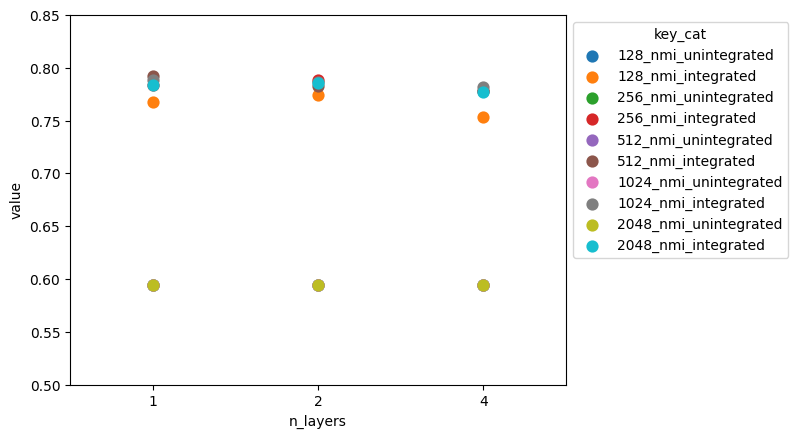

In [568]:
tmp = scib[[x in ['nmi_integrated', 'nmi_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='10k_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.5, 0.85)

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

(0.5, 0.85)

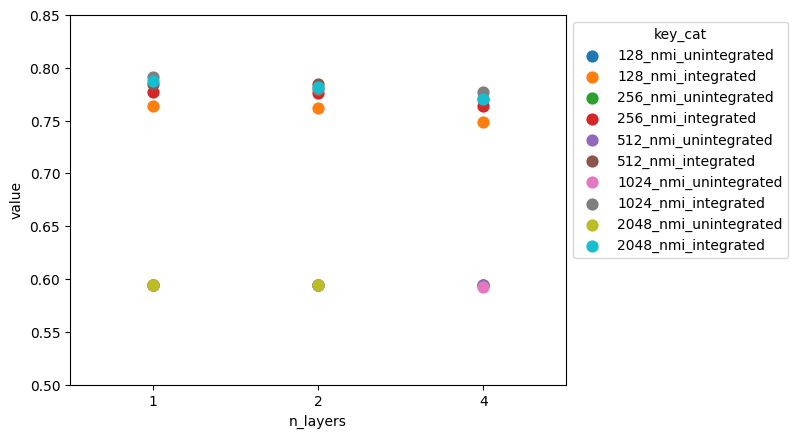

In [569]:
tmp = scib[[x in ['nmi_integrated', 'nmi_unintegrated'] for x in scib['metric']]]
tmp = tmp[tmp['n_cells']=='500k']
tmp['key_cat'] = tmp['n_hidden']+'_'+tmp['metric']
fig = sns.pointplot(tmp[tmp['n_genes']=='all_genes'], y='value', x='n_layers', hue='key_cat', linestyles="none")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.5, 0.85)